# Importing required libraries

In [1197]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings(action='ignore', category=FutureWarning)

%matplotlib inline

In [1198]:
pd.options.display.max_columns = None
pd.options.display.max_rows = 100

# Importing H1N1 Vaccine Dataset

In [1199]:
df = pd.read_csv('h1n1_vaccine_prediction.csv', index_col='unique_id')
df.head(4)

,h1n1_worry,h1n1_awareness,antiviral_medication,contact_avoidance,bought_face_mask,wash_hands_frequently,avoid_large_gatherings,reduced_outside_home_cont,avoid_touch_face,dr_recc_h1n1_vacc,dr_recc_seasonal_vacc,chronic_medic_condition,cont_child_undr_6_mnths,is_health_worker,has_health_insur,is_h1n1_vacc_effective,is_h1n1_risky,sick_from_h1n1_vacc,is_seas_vacc_effective,is_seas_risky,sick_from_seas_vacc,age_bracket,qualification,race,sex,income_level,marital_status,housing_status,employment,census_msa,no_of_adults,no_of_children,h1n1_vaccine
unique_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,1.0,2.0,2.0,1.0,2.0,55 - 64 Years,< 12 Years,White,Female,Below Poverty,Not Married,Own,Not in Labor Force,Non-MSA,0.0,0.0,0
1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,5.0,4.0,4.0,4.0,2.0,4.0,35 - 44 Years,12 Years,White,Male,Below Poverty,Not Married,Rent,Employed,"MSA, Not Principle City",0.0,0.0,0
2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,1.0,0.0,0.0,NaN,3.0,1.0,1.0,4.0,1.0,2.0,18 - 34 Years,College Graduate,White,Male,"<= $75,000, Above Poverty",Not Married,Own,Employed,"MSA, Not Principle City",2.0,0.0,0
3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,NaN,3.0,3.0,5.0,5.0,4.0,1.0,65+ Years,12 Years,White,Female,Below Poverty,Not Married,Rent,Not in Labor Force,"MSA, Principle City",0.0,0.0,0


In [1200]:
df.shape

(26707, 33)

In [1201]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26707 entries, 0 to 26706
Data columns (total 33 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   h1n1_worry                 26615 non-null  float64
 1   h1n1_awareness             26591 non-null  float64
 2   antiviral_medication       26636 non-null  float64
 3   contact_avoidance          26499 non-null  float64
 4   bought_face_mask           26688 non-null  float64
 5   wash_hands_frequently      26665 non-null  float64
 6   avoid_large_gatherings     26620 non-null  float64
 7   reduced_outside_home_cont  26625 non-null  float64
 8   avoid_touch_face           26579 non-null  float64
 9   dr_recc_h1n1_vacc          24547 non-null  float64
 10  dr_recc_seasonal_vacc      24547 non-null  float64
 11  chronic_medic_condition    25736 non-null  float64
 12  cont_child_undr_6_mnths    25887 non-null  float64
 13  is_health_worker           25903 non-null  flo

In [1202]:
df.describe()

,h1n1_worry,h1n1_awareness,antiviral_medication,contact_avoidance,bought_face_mask,wash_hands_frequently,avoid_large_gatherings,reduced_outside_home_cont,avoid_touch_face,dr_recc_h1n1_vacc,dr_recc_seasonal_vacc,chronic_medic_condition,cont_child_undr_6_mnths,is_health_worker,has_health_insur,is_h1n1_vacc_effective,is_h1n1_risky,sick_from_h1n1_vacc,is_seas_vacc_effective,is_seas_risky,sick_from_seas_vacc,no_of_adults,no_of_children,h1n1_vaccine
count,26615.000000,26591.000000,26636.000000,26499.000000,26688.000000,26665.000000,26620.00000,26625.000000,26579.000000,24547.000000,24547.000000,25736.000000,25887.000000,25903.000000,14433.00000,26316.000000,26319.000000,26312.000000,26245.000000,26193.000000,26170.000000,26458.000000,26458.000000,26707.000000
mean,1.618486,1.262532,0.048844,0.725612,0.068982,0.825614,0.35864,0.337315,0.677264,0.220312,0.329735,0.283261,0.082590,0.111918,0.87972,3.850623,2.342566,2.357670,4.025986,2.719162,2.118112,0.886499,0.534583,0.212454
std,0.910311,0.618149,0.215545,0.446214,0.253429,0.379448,0.47961,0.472802,0.467531,0.414466,0.470126,0.450591,0.275266,0.315271,0.32530,1.007436,1.285539,1.362766,1.086565,1.385055,1.332950,0.753422,0.928173,0.409052
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.00000,3.000000,1.000000,1.000000,4.000000,2.000000,1.000000,0.000000,0.000000,0.000000
50%,2.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.00000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.00000,4.000000,2.000000,2.000000,4.000000,2.000000,2.000000,1.000000,0.000000,0.000000
75%,2.000000,2.000000,0.000000,1.000000,0.000000,1.000000,1.00000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.00000,5.000000,4.000000,4.000000,5.000000,4.000000,4.000000,1.000000,1.000000,0.000000
max,3.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,3.000000,3.000000,1.000000


# Checking Duplicates & Missing Values

In [1203]:
df.duplicated().sum()

4

In [1204]:
df.drop_duplicates(ignore_index=True, inplace=True)

In [1205]:
df.duplicated().sum()

0

In [1206]:
missing_values = pd.DataFrame(df.isna().sum().sort_values(ascending=False))
missing_values['Values'] = (df.isna().sum().sort_values(ascending=False)*100/df.shape[0]).values

missing_values

,0,Values
has_health_insur,12272,45.957383
income_level,4423,16.563682
dr_recc_h1n1_vacc,2160,8.088979
dr_recc_seasonal_vacc,2160,8.088979
housing_status,2042,7.647081
employment,1463,5.478785
marital_status,1408,5.272816
qualification,1407,5.269071
chronic_medic_condition,971,3.636296
cont_child_undr_6_mnths,820,3.070816


# Missing value Treatment

In [1207]:
df.dropna(thresh=29, inplace=True)

In [1208]:
df.shape

(25336, 33)

In [1209]:
missing_values = pd.DataFrame(df.isna().sum().sort_values(ascending=False))
missing_values['Values'] = (df.isna().sum().sort_values(ascending=False)*100/df.shape[0]).values

missing_values

,0,Values
has_health_insur,10930,43.140196
income_level,3082,12.164509
dr_recc_seasonal_vacc,1861,7.345279
dr_recc_h1n1_vacc,1861,7.345279
housing_status,732,2.889170
chronic_medic_condition,216,0.852542
employment,185,0.730186
contact_avoidance,180,0.710452
qualification,146,0.576255
marital_status,139,0.548626


- Assumption - *While imputing missing values, in some cases, it is assumed that people ommitted fields if they had to fill  'not have'.*

## 'has_health_insur'

In [1210]:
df['has_health_insur'].value_counts()

1.0    12674
0.0     1732
Name: has_health_insur, dtype: int64

In [1211]:
# 0 is imputed to na places as per above assumption.

df['has_health_insur'].fillna(0, inplace=True)

## 'income_level'

In [1212]:
df.groupby(['income_level'])['housing_status'].value_counts(normalize=True).to_frame()

housing_status
income_level              housing_status                
<= $75,000, Above Poverty Own                   0.753245
                          Rent                  0.246755
> $75,000                 Own                   0.908421
                          Rent                  0.091579
Below Poverty             Rent                  0.586076
                          Own                   0.413924

In [1213]:
df[df['income_level'].isna()]['housing_status'].value_counts(normalize=True)

Own     0.753538
Rent    0.246462
Name: housing_status, dtype: float64

In [1214]:
# Na values are more similar to '<= $75,000, Above Poverty' in terms of 'housing_status'. Hence, replacing with the same.

df['income_level'].fillna('<= $75,000, Above Poverty', inplace=True)

## 'dr_recc_h1n1_vacc' - Doctor has recommended h1n1 vaccine or not

In [1215]:
df.groupby(['dr_recc_h1n1_vacc'])['dr_recc_seasonal_vacc'].value_counts(normalize=True).to_frame()

dr_recc_seasonal_vacc
dr_recc_h1n1_vacc dr_recc_seasonal_vacc                       
0.0               0.0                                 0.816829
                  1.0                                 0.183171
1.0               1.0                                 0.856071
                  0.0                                 0.143929

In [1216]:
df[df['dr_recc_h1n1_vacc'].isna()]['h1n1_vaccine'].value_counts()

0    1726
1     135
Name: h1n1_vaccine, dtype: int64

In [1217]:
df[df['dr_recc_h1n1_vacc'].isna()]['dr_recc_seasonal_vacc'].value_counts(normalize=True)

Series([], Name: dr_recc_seasonal_vacc, dtype: float64)

In [1218]:
df['dr_recc_h1n1_vacc'].fillna(0, inplace=True)

## 'dr_recc_seasonal_vacc' - The doctor has recommended seasonalflu vaccine

In [1219]:
df[df['dr_recc_seasonal_vacc'].isna()]['h1n1_vaccine'].value_counts()

0    1726
1     135
Name: h1n1_vaccine, dtype: int64

In [1220]:
# dr_recc_seasonal_vacc's isna count is same as dr_recc_h1n1_vacc's isna count, so it might be people who were not recommended 
# h1n1 vaccine might not have got seasonalflu recommendation

df['dr_recc_seasonal_vacc'].fillna(0, inplace=True)

## 'qualification'

In [1221]:
df['qualification'].value_counts()

College Graduate    10056
Some College         7027
12 Years             5767
< 12 Years           2340
Name: qualification, dtype: int64

In [1222]:
df[df['qualification'].isna()]['employment'].value_counts()

Not in Labor Force    75
Employed              55
Unemployed             8
Name: employment, dtype: int64

In [1223]:
df.groupby(['qualification'])['employment'].value_counts(normalize=True).to_frame()

employment
qualification    employment                    
12 Years         Not in Labor Force    0.487831
                 Employed              0.436876
                 Unemployed            0.075293
< 12 Years       Not in Labor Force    0.587041
                 Employed              0.313175
                 Unemployed            0.099784
College Graduate Employed              0.658734
                 Not in Labor Force    0.305169
                 Unemployed            0.036096
Some College     Employed              0.523905
                 Not in Labor Force    0.415832
                 Unemployed            0.060263

In [1224]:
def qual(x):
    employ = x[0]
    qual = x[1]

    if pd.isna(qual):
        if employ== 'Unemployed':
            return '< 12 Years'
        elif employ== 'Not in Labor Force':
            return '12 Years'
        elif employ== 'Employed':
            return 'College Graduate'
        else:
            return '< 12 Years'
    else:
        return qual

In [1225]:
df['qualification'] = df[['employment','qualification']].apply(qual, axis=1)

## 'housing_status'

In [1226]:
df['housing_status'].value_counts()

Own     18689
Rent     5915
Name: housing_status, dtype: int64

In [1227]:
df.groupby(['income_level','qualification'])['housing_status'].value_counts(normalize=True).to_frame()

housing_status
income_level              qualification    housing_status                
<= $75,000, Above Poverty 12 Years         Own                   0.750496
                                           Rent                  0.249504
                          < 12 Years       Own                   0.646927
                                           Rent                  0.353073
                          College Graduate Own                   0.787607
                                           Rent                  0.212393
                          Some College     Own                   0.748397
                                           Rent                  0.251603
> $75,000                 12 Years         Own                   0.913043
                                           Rent                  0.086957
                          < 12 Years       Own                   0.824000
                                           Rent                  0.176000
                          College Graduate Own                   0.908970
                                           Rent                  0.091030
                          Some College     Own                   0.911784
                                           Rent                  0.088216
Below Poverty             12 Years         Rent                  0.592275
                                           Own                   0.407725
                          < 12 Years       Rent                  0.591837
                                           Own                   0.408163
                          College Graduate Rent                  0.554745
                                           Own                   0.445255
                          Some College     Rent                  0.583461
                                           Own                   0.416539

In [1228]:
pd.crosstab(df[df['housing_status'].notna()]['income_level'],df[df['housing_status'].notna()]['qualification'], normalize='index')

qualification,12 Years,< 12 Years,College Graduate,Some College
income_level,,,,
"<= $75,000, Above Poverty",0.265876,0.087879,0.338076,0.308169
"> $75,000",0.094971,0.018434,0.662587,0.224008
Below Poverty,0.352630,0.296633,0.103670,0.247068


In [1229]:
def housing(x):
    income = x[0]
    qual = x[1]
    housing_status = x[2]
    
    if pd.isna(housing_status):
        if income== 'Below Poverty':
            return 'Rent'
        elif income== '> $75,000':
            return 'Own'
        elif income== '<= $75,000, Above Poverty' and qual == '< 12 Years':
            return 'Rent'
        elif income== '<= $75,000, Above Poverty' and (qual== '12 Years' or qual== 'College Graduate' or qual== 'Some College'):
            return 'Own'
        else:
            'Rent'
    else:
        return housing_status

In [1230]:
df['housing_status'] = df[['income_level','qualification','housing_status']].apply(housing, axis=1)

## 'marital_status'

In [1231]:
df['marital_status'].value_counts()

Married        13511
Not Married    11686
Name: marital_status, dtype: int64

In [1232]:
df.groupby(['no_of_children'])['marital_status'].value_counts(normalize=True).to_frame()

marital_status
no_of_children marital_status                
0.0            Not Married           0.528366
               Married               0.471634
1.0            Married               0.624662
               Not Married           0.375338
2.0            Married               0.750283
               Not Married           0.249717
3.0            Married               0.746851
               Not Married           0.253149

In [1233]:
df[df['marital_status'].isna()]['no_of_children'].value_counts()

0.0    121
1.0      8
2.0      7
3.0      3
Name: no_of_children, dtype: int64

In [1234]:
def married(x):
    married = x[0]
    kids = x[1]
 
    if pd.isna(married):
        if kids== 0:
            return 'Not Married'
        else:
            return 'Married'
    else:
        return married

In [1235]:
df['marital_status'] = df[['marital_status','no_of_children']].apply(married, axis=1)

## 'chronic_medic_condition'

In [1236]:
df['chronic_medic_condition'].value_counts()

0.0    17960
1.0     7160
Name: chronic_medic_condition, dtype: int64

In [1237]:
# 0 is imputed to na places as per above assumption.

df['chronic_medic_condition'].fillna(0, inplace=True)

## 'contact_avoidance'

In [1238]:
df['contact_avoidance'].value_counts()

1.0    18341
0.0     6815
Name: contact_avoidance, dtype: int64

In [1239]:
df[df['contact_avoidance'].isna()]['h1n1_awareness'].value_counts()

1.0    92
2.0    53
0.0    31
Name: h1n1_awareness, dtype: int64

In [1240]:
df.groupby(['h1n1_worry','h1n1_awareness'])['contact_avoidance'].value_counts(normalize=True).to_frame()

contact_avoidance
h1n1_worry h1n1_awareness contact_avoidance                   
0.0        0.0            0.0                         0.553345
                          1.0                         0.446655
           1.0            0.0                         0.513850
                          1.0                         0.486150
           2.0            1.0                         0.530715
                          0.0                         0.469285
1.0        0.0            1.0                         0.559160
                          0.0                         0.440840
           1.0            1.0                         0.662503
                          0.0                         0.337497
           2.0            1.0                         0.701713
                          0.0                         0.298287
2.0        0.0            1.0                         0.705357
                          0.0                         0.294643
           1.0            1.0                         0.805269
                          0.0                         0.194731
           2.0            1.0                         0.816533
                          0.0                         0.183467
3.0        0.0            1.0                         0.701863
                          0.0                         0.298137
           1.0            1.0                         0.836589
                          0.0                         0.163411
           2.0            1.0                         0.871609
                          0.0                         0.128391

In [1241]:
def contact(x):
    worry = x[0]
    aware = x[1]
    contact = x[2]
    
    if pd.isna(contact):
        if worry == 0:
            return 0
        elif (worry == 1) and (aware <= 1):
            return 0
        else:
            return 1
    else:
        return contact

In [1242]:
df['contact_avoidance'] = df[['h1n1_worry','h1n1_awareness','contact_avoidance']].apply(contact, axis=1)

## 'employment' 

In [1243]:
df['employment'].value_counts()

Employed              13523
Not in Labor Force    10177
Unemployed             1451
Name: employment, dtype: int64

In [1244]:
df[df['employment'].isna()]['is_health_worker'].value_counts()

0.0    171
1.0     14
Name: is_health_worker, dtype: int64

In [1245]:
df[df['employment'].isna()]['income_level'].value_counts()

<= $75,000, Above Poverty    166
Below Poverty                 11
> $75,000                      8
Name: income_level, dtype: int64

In [1246]:
df[df['employment'].isna()]['qualification'].value_counts()

12 Years            56
College Graduate    55
Some College        41
< 12 Years          33
Name: qualification, dtype: int64

In [1247]:
df.groupby(['housing_status'])['employment'].value_counts().to_frame()

employment
housing_status employment                    
Own            Employed                 10579
               Not in Labor Force        7718
               Unemployed                 849
Rent           Employed                  2944
               Not in Labor Force        2459
               Unemployed                 602

In [1248]:
df.groupby(['income_level'])['employment'].value_counts().to_frame()

employment
income_level              employment                    
<= $75,000, Above Poverty Employed                  7672
                          Not in Labor Force        7132
                          Unemployed                 872
> $75,000                 Employed                  5067
                          Not in Labor Force        1533
                          Unemployed                 194
Below Poverty             Not in Labor Force        1512
                          Employed                   784
                          Unemployed                 385

In [1249]:
def employ(x):
    health = x[0]
    qual = x[1]
    house = x[2]
    income = x[3]
    employ = x[4]
    
    if pd.isna(employ):
        if health== 1:
            return 'Employed'
        elif house== 'Own':
            return 'Not in Labor Force'
        elif income== 'Below Poverty':
            return 'Unemployed'
        elif income== '> $75,000':
            return 'Employed'
        elif income== '<= $75,000, Above Poverty' and (qual== 'College Graduate' or qual== 'Some College'):
            return 'Employed'
        elif income== '<= $75,000, Above Poverty':
            return 'Not in Labor Force'
    else:
        return employ

In [1250]:
df['employment'] = df[['is_health_worker','qualification','housing_status','income_level','employment']].apply(employ, axis=1)

## avoid_touch_face

In [1251]:
df['avoid_touch_face'].value_counts()

1.0    17125
0.0     8106
Name: avoid_touch_face, dtype: int64

In [1252]:
df[df['avoid_touch_face'].isna()]['h1n1_worry'].value_counts()

1.0    38
2.0    33
0.0    20
3.0    14
Name: h1n1_worry, dtype: int64

In [1253]:
df.groupby(['h1n1_worry'])['avoid_touch_face'].value_counts(normalize=True).to_frame()

avoid_touch_face
h1n1_worry avoid_touch_face                  
0.0        0.0                       0.530921
           1.0                       0.469079
1.0        1.0                       0.586677
           0.0                       0.413323
2.0        1.0                       0.749777
           0.0                       0.250223
3.0        1.0                       0.830211
           0.0                       0.169789

In [1254]:
def touch_face(x):
    worry = x[0]
    touch_face = x[1]
    
    if pd.isna(touch_face):
        if worry < 2:
            return 0
        else:
            return 1
    else:
        return touch_face

In [1255]:
df['avoid_touch_face'] = df[['h1n1_worry','avoid_touch_face']].apply(touch_face, axis=1)

## 'h1n1_awareness'

In [1256]:
df['h1n1_awareness'].value_counts()

1.0    13910
2.0     9140
0.0     2186
Name: h1n1_awareness, dtype: int64

In [1257]:
df[df['h1n1_awareness'].isna()]['h1n1_worry'].value_counts()

1.0    27
0.0    27
2.0    24
3.0    17
Name: h1n1_worry, dtype: int64

In [1258]:
df.groupby(['contact_avoidance','h1n1_worry'])['h1n1_awareness'].value_counts().to_frame()

h1n1_awareness
contact_avoidance h1n1_worry h1n1_awareness                
0.0               0.0        1.0                        758
                             2.0                        480
                             0.0                        319
                  1.0        1.0                       1601
                             2.0                        766
                             0.0                        237
                  2.0        1.0                       1094
                             2.0                        708
                             0.0                        165
                  3.0        1.0                        343
                             2.0                        213
                             0.0                        144
1.0               0.0        1.0                        702
                             2.0                        527
                             0.0                        247
                  1.0        1.0                       3076
                             2.0                       1814
                             0.0                        293
                  2.0        1.0                       4554
                             2.0                       3168
                             0.0                        403
                  3.0        1.0                       1768
                             2.0                       1456
                             0.0                        343

In [1259]:
def aware(x):
    contact = x[0]
    worry = x[1]
    aware = x[2]
    
    if pd.isna(aware):
        if (contact == 0) and (worry <= 1):
            return 0
        else:
            return 1
    else:
        return aware

In [1260]:
df['h1n1_awareness'] = df[['contact_avoidance','h1n1_worry','h1n1_awareness']].apply(aware, axis=1)

## 'is_h1n1_vacc_effective'

In [1261]:
df['is_h1n1_vacc_effective'].value_counts()

4.0    11319
5.0     6942
3.0     4412
2.0     1775
1.0      812
Name: is_h1n1_vacc_effective, dtype: int64

In [1262]:
df[df['is_h1n1_vacc_effective'].isna()]['h1n1_worry'].value_counts()

1.0    27
2.0    22
0.0    20
3.0     6
Name: h1n1_worry, dtype: int64

In [1263]:
df.groupby(['h1n1_awareness','sick_from_h1n1_vacc'])['is_h1n1_vacc_effective'].value_counts().to_frame()

is_h1n1_vacc_effective
h1n1_awareness sick_from_h1n1_vacc is_h1n1_vacc_effective                        
0.0            1.0                 3.0                                        273
                                   4.0                                        223
                                   5.0                                        158
                                   1.0                                        107
                                   2.0                                         72
               2.0                 4.0                                        264
                                   3.0                                        169
                                   5.0                                        145
                                   2.0                                         65
                                   1.0                                         31
               3.0                 3.0                                         30
                                   4.0                                          3
                                   5.0                                          2
                                   1.0                                          1
               4.0                 4.0                                        182
                                   5.0                                         92
                                   3.0                                         90
                                   2.0                                         19
                                   1.0                                          5
               5.0                 5.0                                         96
                                   3.0                                         69
                                   4.0                                         59
                                   1.0                                         31
                                   2.0                                         20
1.0            1.0                 4.0                                       1905
                                   5.0                                       1009
                                   3.0                                        900
                                   2.0                                        379
                                   1.0                                        207
               2.0                 4.0                                       2747
                                   5.0                                       1091
                                   3.0                                        884
                                   2.0                                        366
                                   1.0                                         66
               3.0                 3.0                                         47
                                   4.0                                         14
                                   5.0                                          6
                                   1.0                                          2
                                   2.0                                          2
               4.0                 4.0                                       1651
                                   5.0                                        856
                                   3.0                                        542
                                   2.0                                        188
                                   1.0                                         39
               5.0                 4.0                                        374
                                   5.0                                        348
                                   3.0                                        169
                                   2.0   

In [1264]:
def vacc_effect(x):
    aware = x[0]
    sick_vacc = x[1]
    vacc_effect = x[2]
    
    if pd.isna(vacc_effect):
        if (aware == 0) and (sick_vacc <= 3):
            return 3
        elif (aware == 0) and (sick_vacc > 3):
            return 4
        elif (aware == 1) and (sick_vacc <= 2):
            return 4
        elif (aware == 1) and (sick_vacc == 0):
            return 2
        elif (aware == 1) and (sick_vacc == 1):
            return 3
        elif (aware == 2) and (sick_vacc == 0):
            return 4
        elif (aware == 2) and (sick_vacc == 1):
            return 5
    else:
        return vacc_effect

In [1265]:
df['is_h1n1_vacc_effective'] = df[['h1n1_awareness','avoid_large_gatherings','is_h1n1_vacc_effective']].apply(vacc_effect, axis=1)

## Other Columns with Missing values

In [1266]:
missing_col = []

for i in df.columns:
    if df[i].isna().sum() > 0:
        missing_col.append(i)

print(missing_col)

['h1n1_worry', 'antiviral_medication', 'bought_face_mask', 'wash_hands_frequently', 'avoid_large_gatherings', 'reduced_outside_home_cont', 'cont_child_undr_6_mnths', 'is_health_worker', 'is_h1n1_vacc_effective', 'is_h1n1_risky', 'sick_from_h1n1_vacc', 'is_seas_vacc_effective', 'is_seas_risky', 'sick_from_seas_vacc', 'no_of_adults', 'no_of_children']


In [1267]:
# Here, I have filled na values on based above assumption.

for i in missing_col:
    x = min(df[i].unique())
    df[i].fillna(x,inplace=True)

# Visualising Variables

In [1268]:
plt.rcParams['figure.figsize'] = (9,6)

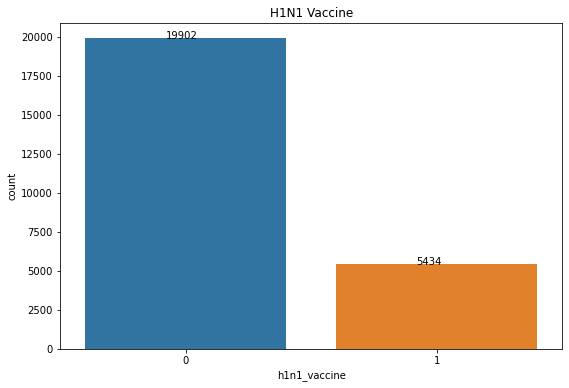

In [1269]:
ax = sns.countplot('h1n1_vaccine', data=df)

for p in ax.patches:
   ax.annotate('{:0.0f}'.format(p.get_height()), (p.get_x()+0.32, p.get_height()+0.01))

plt.title('H1N1 Vaccine')
plt.show()

## Bifurcating Numerical category features and String category features

In [1270]:
num_cat = []
str_cat = []

for i in df.columns:
    if type(df[i].unique()[0]) != str:
        num_cat.append(i)
    else:
        str_cat.append(i)

In [1271]:
num_cat

['h1n1_worry',
 'h1n1_awareness',
 'antiviral_medication',
 'contact_avoidance',
 'bought_face_mask',
 'wash_hands_frequently',
 'avoid_large_gatherings',
 'reduced_outside_home_cont',
 'avoid_touch_face',
 'dr_recc_h1n1_vacc',
 'dr_recc_seasonal_vacc',
 'chronic_medic_condition',
 'cont_child_undr_6_mnths',
 'is_health_worker',
 'has_health_insur',
 'is_h1n1_vacc_effective',
 'is_h1n1_risky',
 'sick_from_h1n1_vacc',
 'is_seas_vacc_effective',
 'is_seas_risky',
 'sick_from_seas_vacc',
 'no_of_adults',
 'no_of_children',
 'h1n1_vaccine']

In [1272]:
str_cat

['age_bracket',
 'qualification',
 'race',
 'sex',
 'income_level',
 'marital_status',
 'housing_status',
 'employment',
 'census_msa']

## Visualizing Str_cat features

Feature : age_bracket


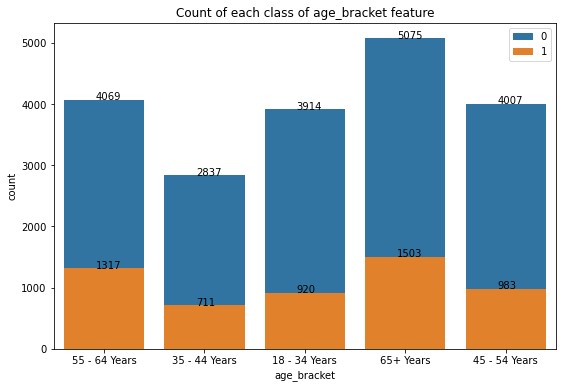

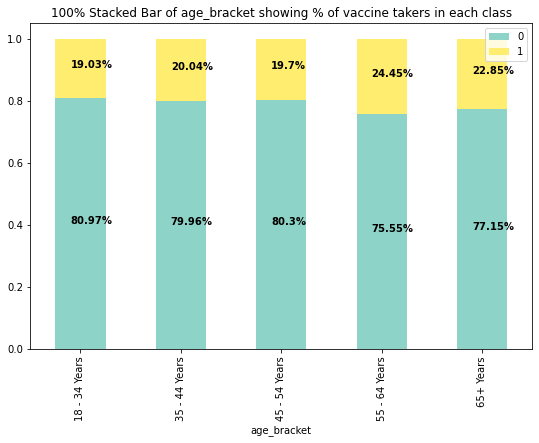

**************************************************************************************************** 

Feature : qualification


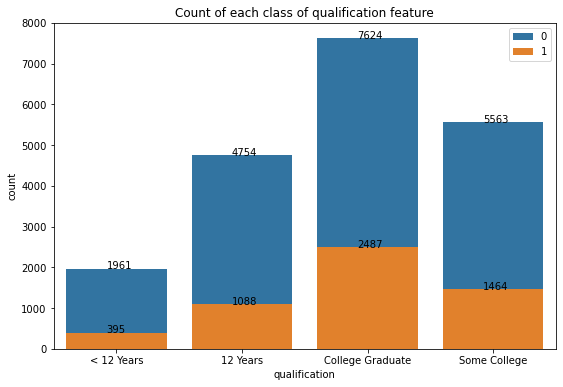

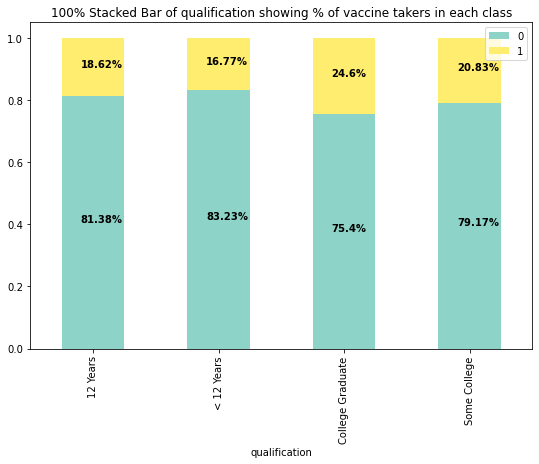

**************************************************************************************************** 

Feature : race


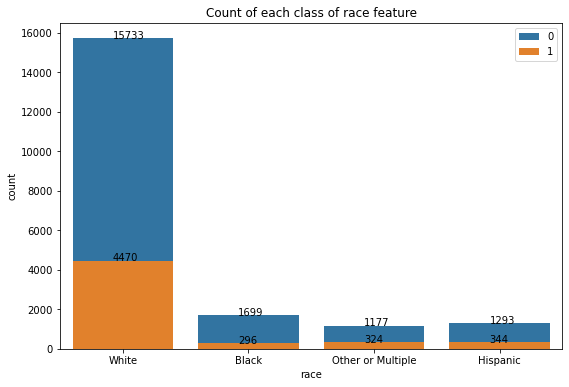

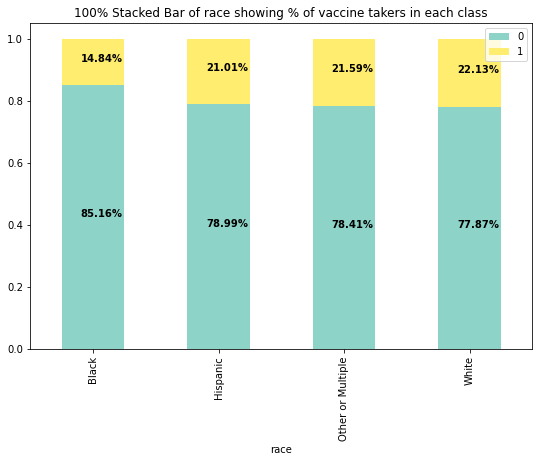

**************************************************************************************************** 

Feature : sex


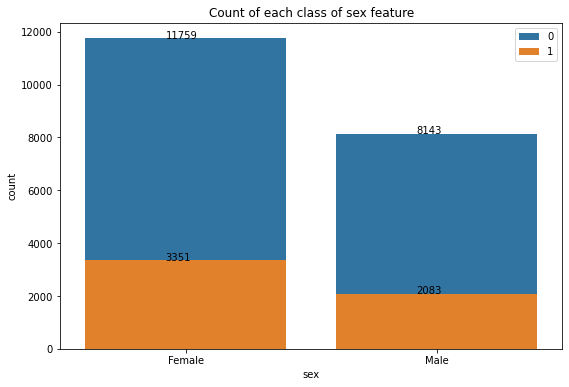

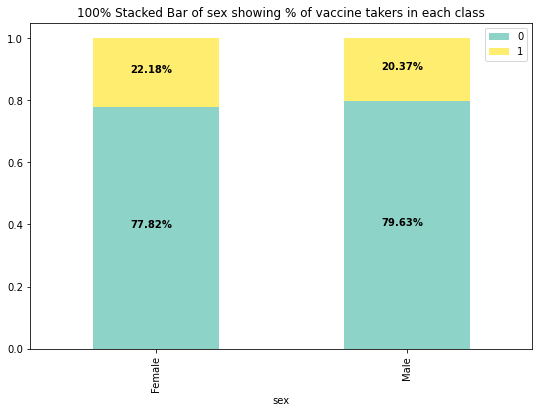

**************************************************************************************************** 

Feature : income_level


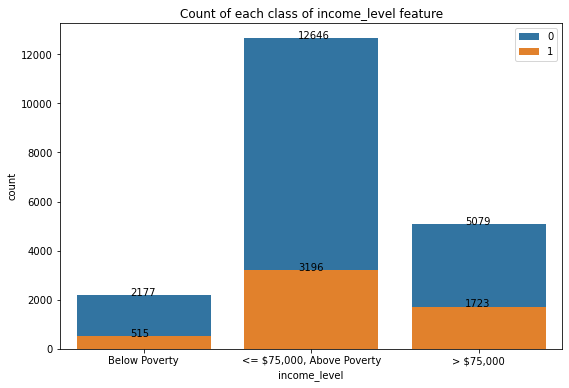

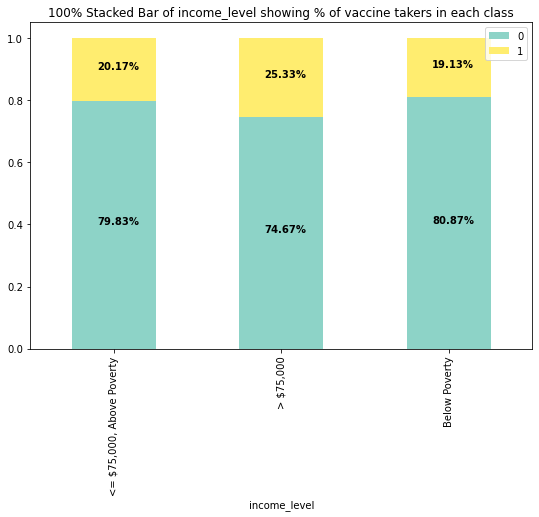

**************************************************************************************************** 

Feature : marital_status


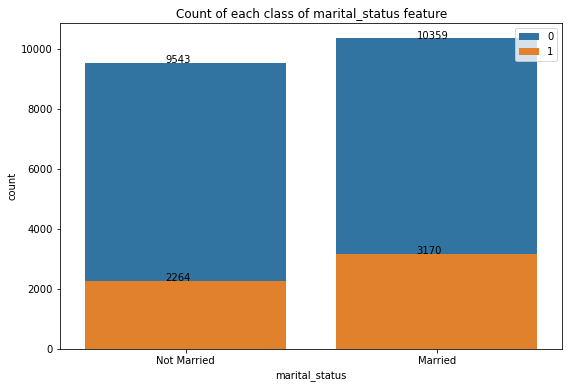

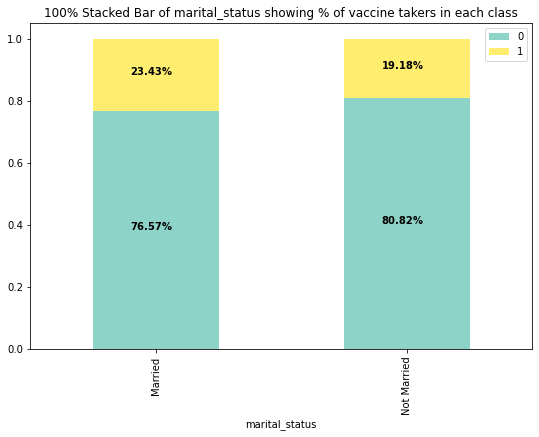

**************************************************************************************************** 

Feature : housing_status


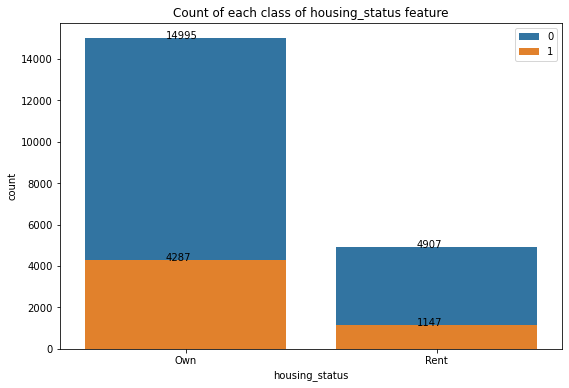

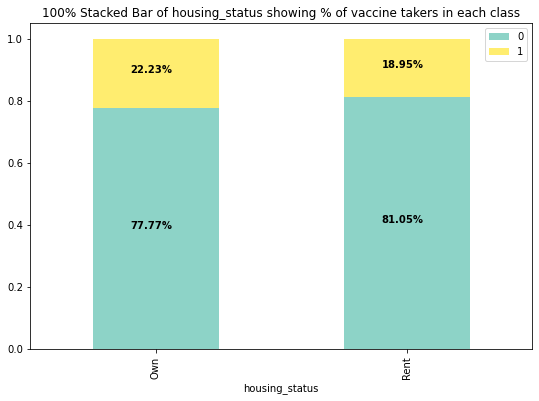

**************************************************************************************************** 

Feature : employment


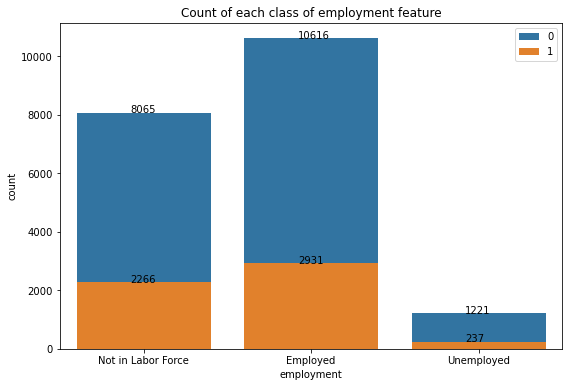

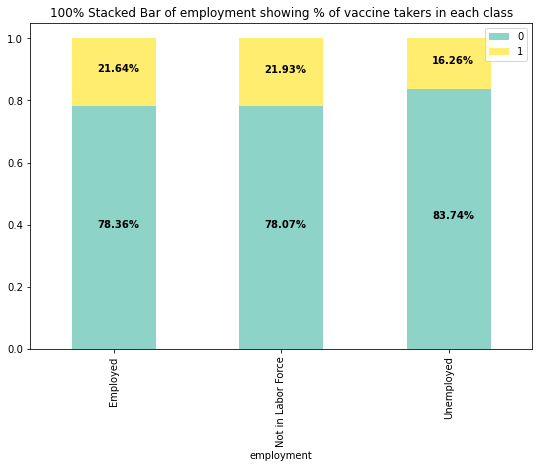

**************************************************************************************************** 

Feature : census_msa


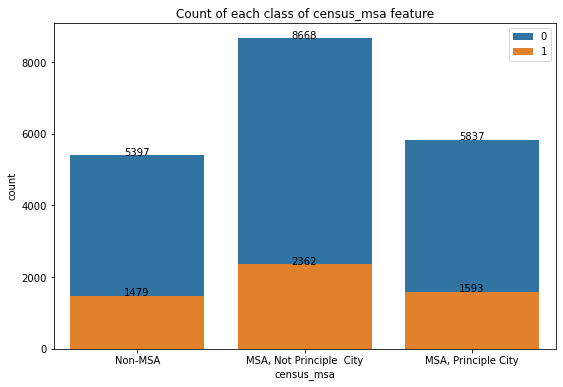

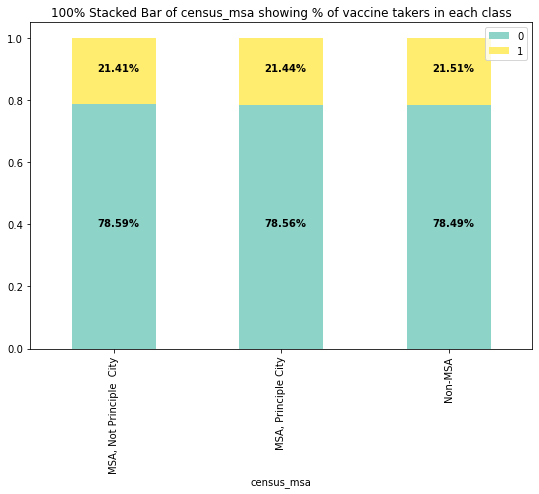

**************************************************************************************************** 



In [1273]:
for i in str_cat:
    if i != 'h1n1_vaccine':
        print('Feature :', i)

        ax = sns.countplot(i, data=df, dodge=False, hue='h1n1_vaccine')
        for p in ax.patches:
           ax.annotate('{:0.0f}'.format(p.get_height()), (p.get_x()+0.32, p.get_height()+0.01))

        plt.title('Count of each class of {} feature'.format(i))
        plt.legend(loc='upper right')
        plt.show()
        
# -----------------------------------------------------------------------------------------------
        
        cross_tab_prop = pd.crosstab(df[i], df['h1n1_vaccine'], normalize='index')
        cross_tab_prop.plot(kind='bar', stacked=True, colormap='Set3')

        for n, x in enumerate([*cross_tab_prop.index.values]):

            for (proportion, y_loc) in zip(cross_tab_prop.loc[x],cross_tab_prop.loc[x].cumsum()):
                plt.text(x=(n - 0.1), y=(y_loc - proportion) + (proportion/2), s=f'{np.round(proportion*100, 2)}%', fontweight='bold')
        
        plt.title('100% Stacked Bar of {} showing % of vaccine takers in each class'.format(i))
        plt.legend(loc="upper right")
        plt.show()
        print('*'*100, '\n')

In [1274]:
df['race'] = df['race'].apply(lambda x: x if (x=='Black') or (x=='White') else 'Others')

In [1275]:
df['age_bracket'] = df['age_bracket'].apply(lambda x: '55+' if (x=='55 - 64 Years') or (x=='65+ Years') else '18-54')

In [1276]:
df['employment'] = df['employment'].apply(lambda x: x if x=='Unemployed' else 'Employed')

## Visualizing Num_cat features

Feature : h1n1_worry


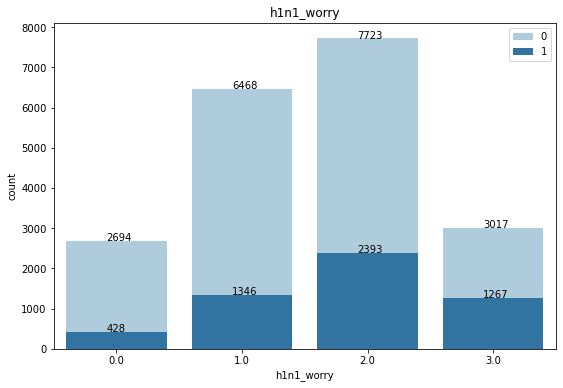

****************************************************************************************************
Feature : h1n1_awareness


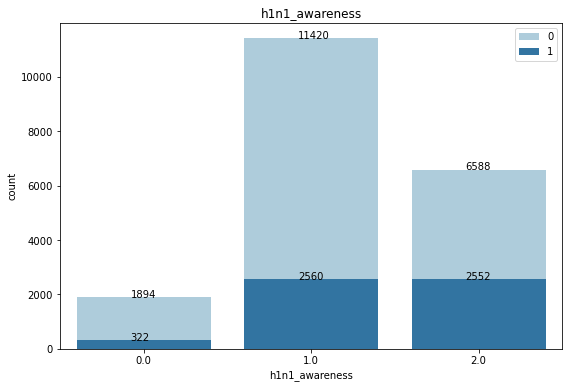

****************************************************************************************************
Feature : antiviral_medication


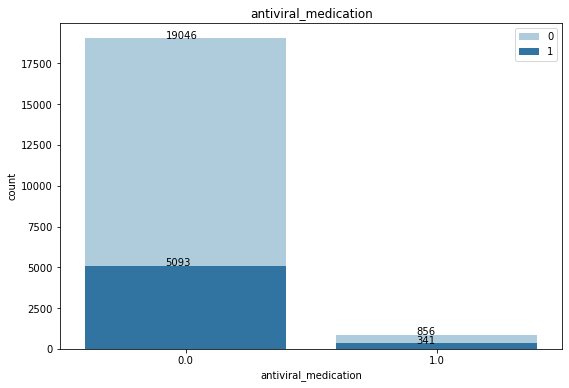

****************************************************************************************************
Feature : contact_avoidance


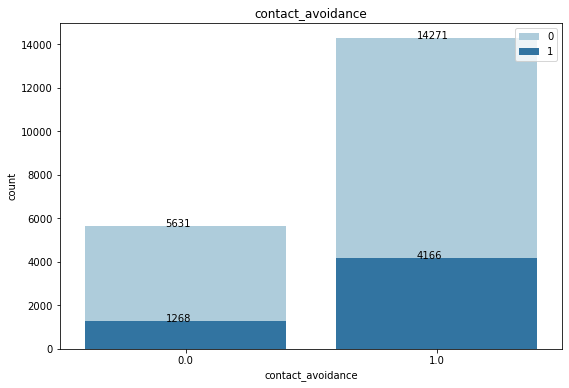

****************************************************************************************************
Feature : bought_face_mask


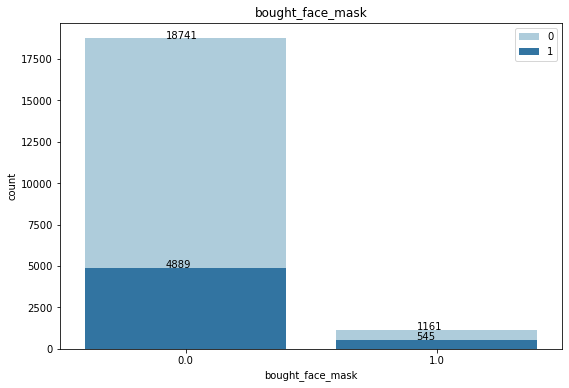

****************************************************************************************************
Feature : wash_hands_frequently


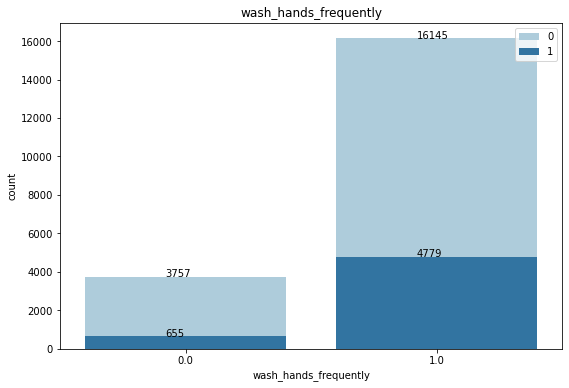

****************************************************************************************************
Feature : avoid_large_gatherings


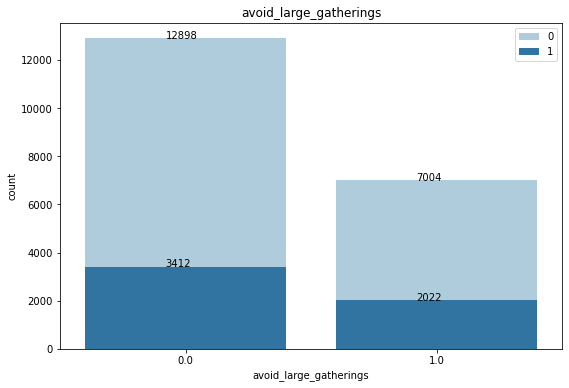

****************************************************************************************************
Feature : reduced_outside_home_cont


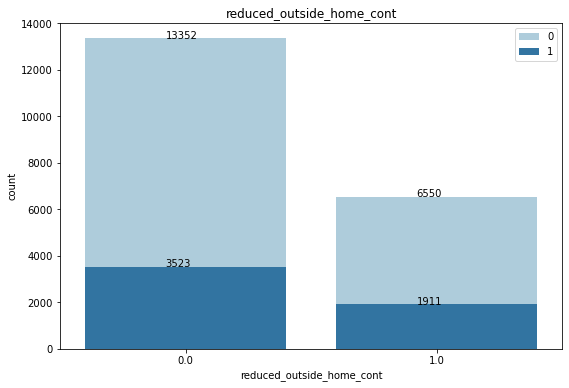

****************************************************************************************************
Feature : avoid_touch_face


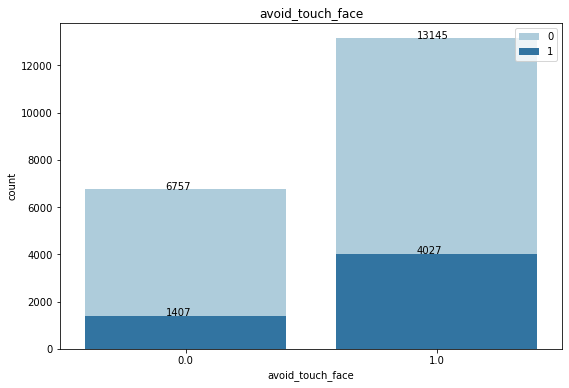

****************************************************************************************************
Feature : dr_recc_h1n1_vacc


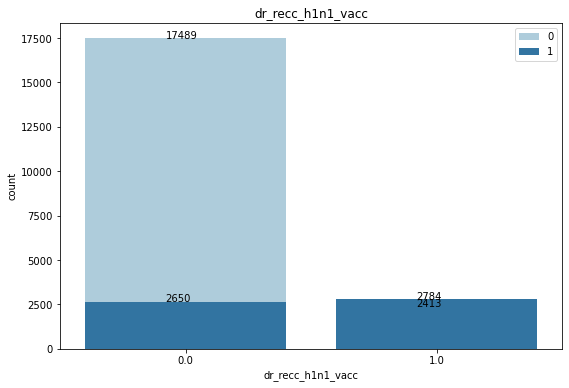

****************************************************************************************************
Feature : dr_recc_seasonal_vacc


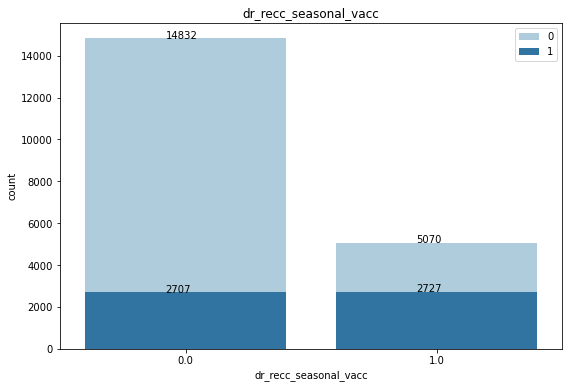

****************************************************************************************************
Feature : chronic_medic_condition


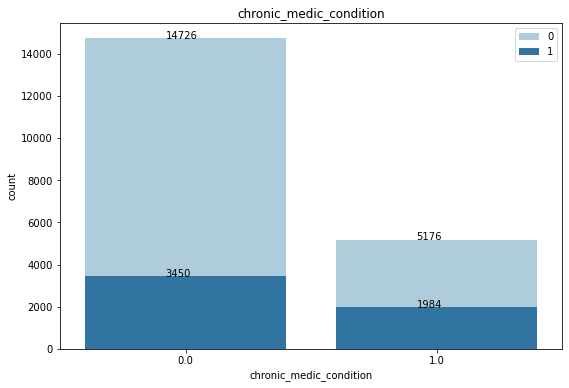

****************************************************************************************************
Feature : cont_child_undr_6_mnths


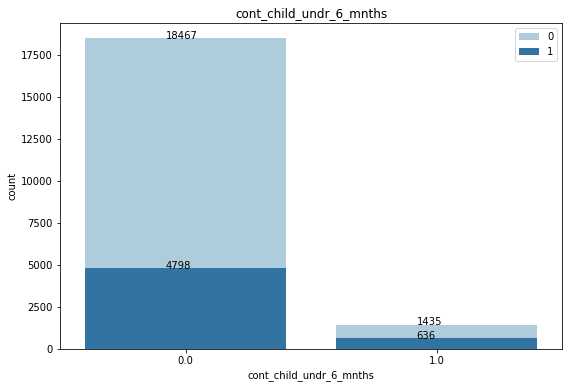

****************************************************************************************************
Feature : is_health_worker


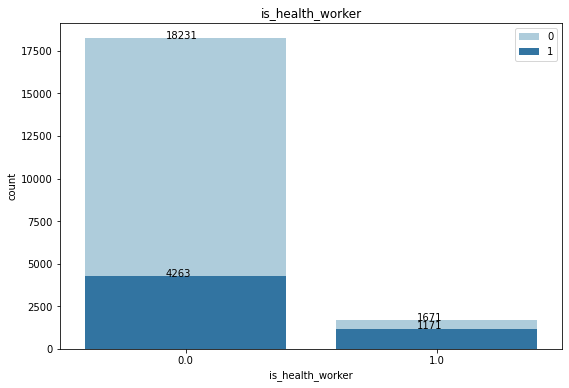

****************************************************************************************************
Feature : has_health_insur


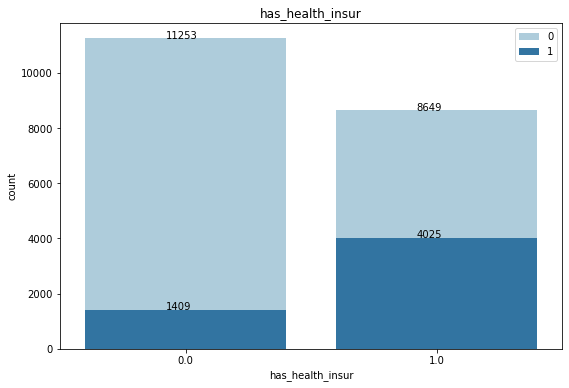

****************************************************************************************************
Feature : is_h1n1_vacc_effective


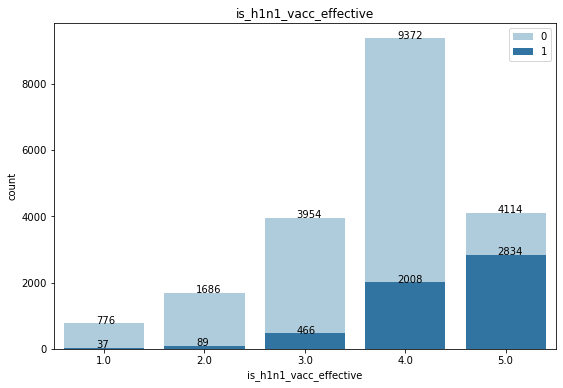

****************************************************************************************************
Feature : is_h1n1_risky


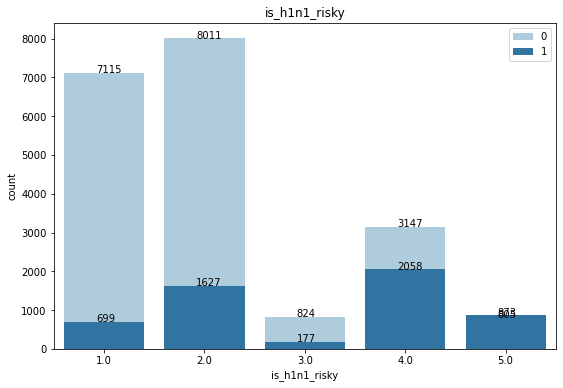

****************************************************************************************************
Feature : sick_from_h1n1_vacc


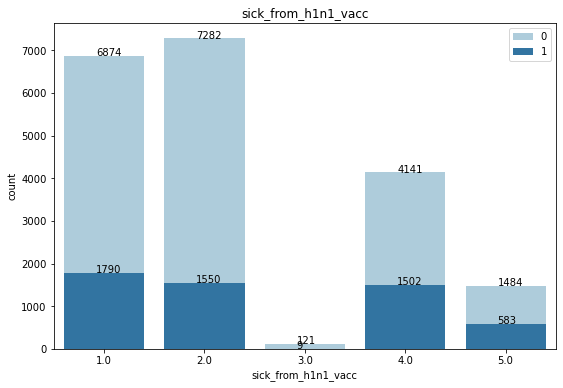

****************************************************************************************************
Feature : is_seas_vacc_effective


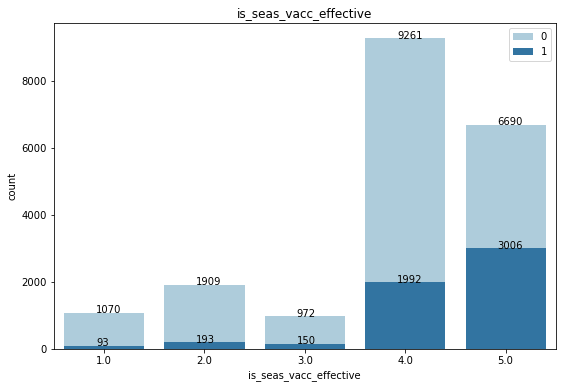

****************************************************************************************************
Feature : is_seas_risky


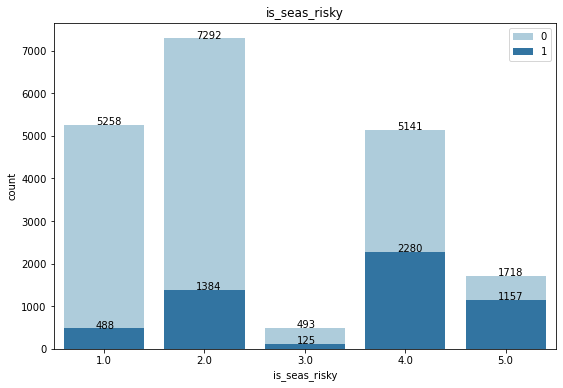

****************************************************************************************************
Feature : sick_from_seas_vacc


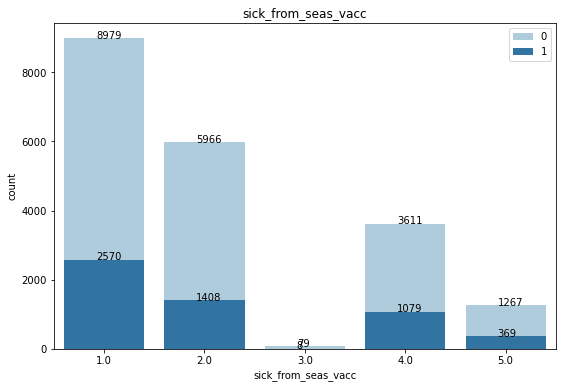

****************************************************************************************************
Feature : no_of_adults


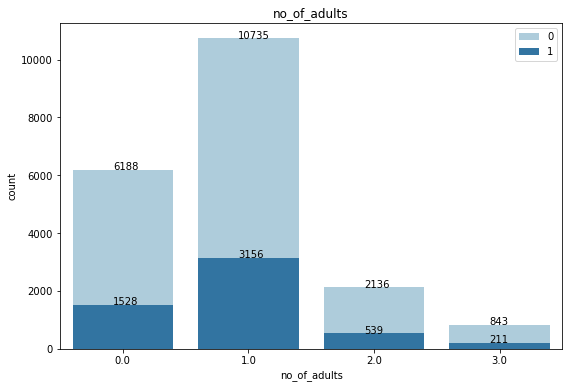

****************************************************************************************************
Feature : no_of_children


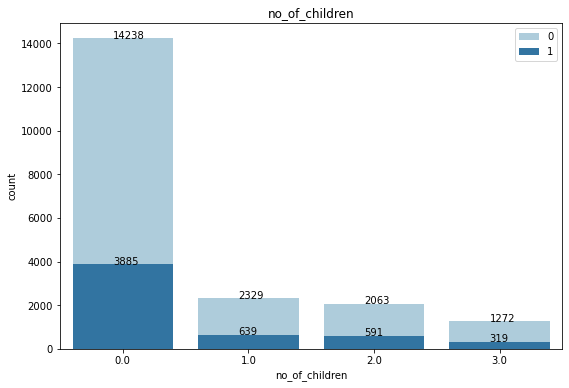

****************************************************************************************************


In [1277]:
# Countplot by Seaborn

for i in num_cat:
    if i != 'h1n1_vaccine':
        print('Feature :', i)

        ax = sns.countplot(i, data=df, dodge=False, hue='h1n1_vaccine', palette='Paired')

        for p in ax.patches:
           ax.annotate('{:0.0f}'.format(p.get_height()), (p.get_x()+0.32, p.get_height()+0.01))

        plt.title(i)
        plt.legend(loc='upper right')
        plt.show()
        print('*'*100)

Feature : h1n1_worry


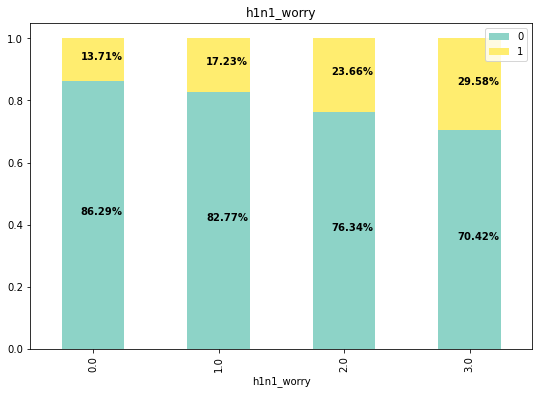

****************************************************************************************************
Feature : h1n1_awareness


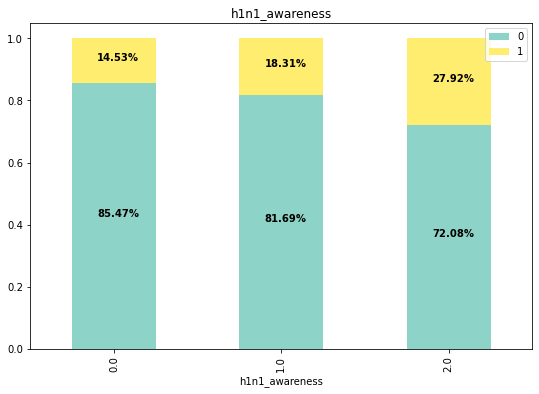

****************************************************************************************************
Feature : antiviral_medication


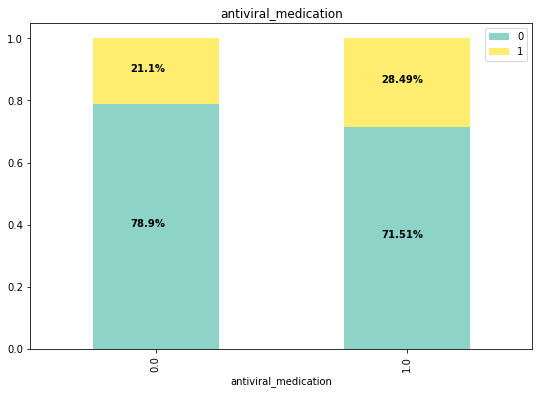

****************************************************************************************************
Feature : contact_avoidance


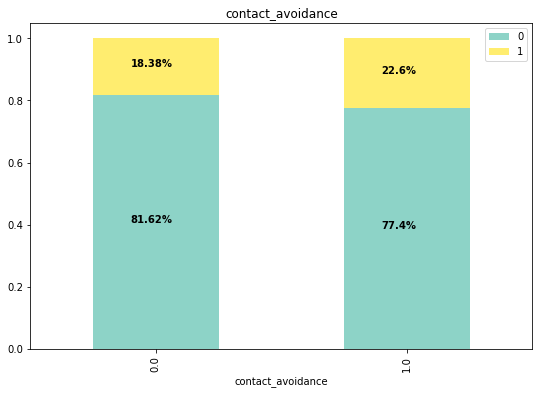

****************************************************************************************************
Feature : bought_face_mask


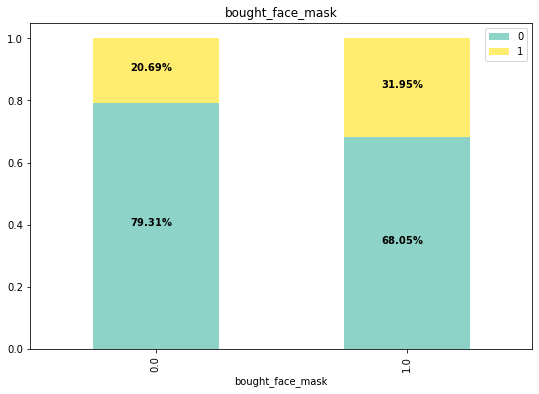

****************************************************************************************************
Feature : wash_hands_frequently


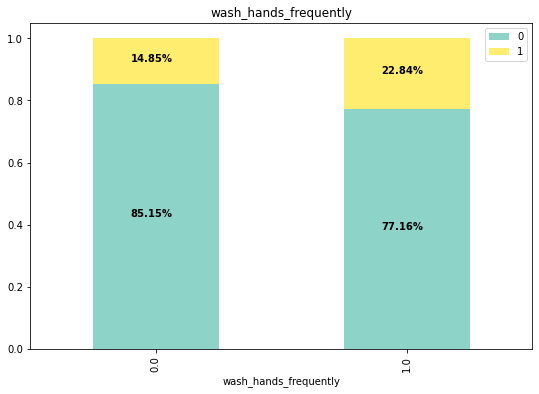

****************************************************************************************************
Feature : avoid_large_gatherings


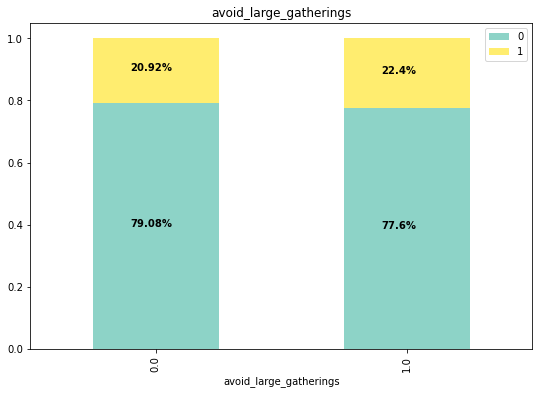

****************************************************************************************************
Feature : reduced_outside_home_cont


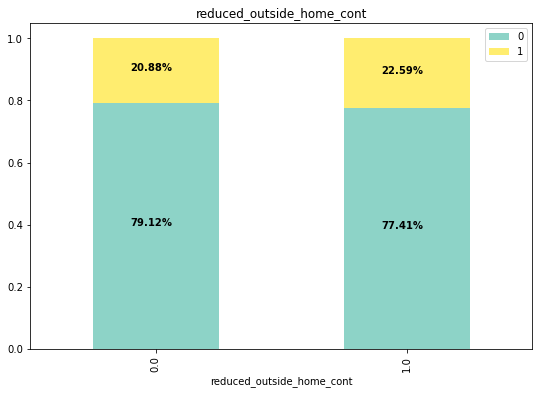

****************************************************************************************************
Feature : avoid_touch_face


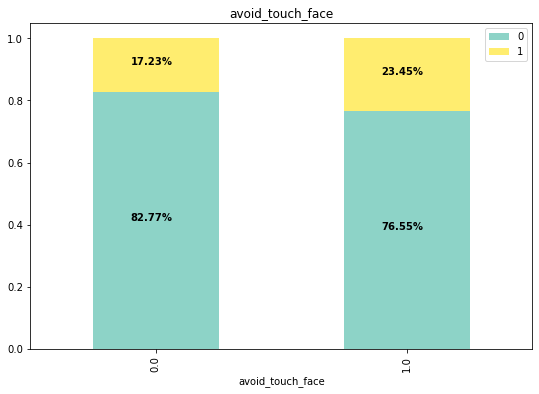

****************************************************************************************************
Feature : dr_recc_h1n1_vacc


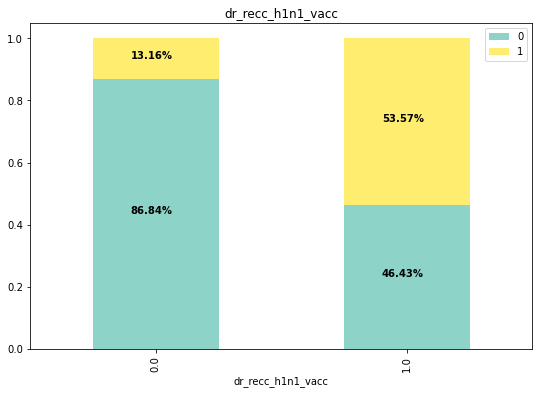

****************************************************************************************************
Feature : dr_recc_seasonal_vacc


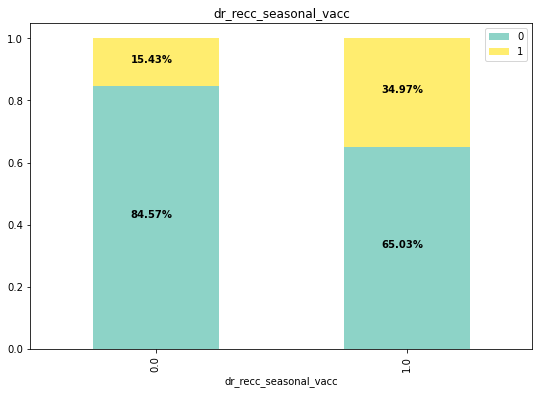

****************************************************************************************************
Feature : chronic_medic_condition


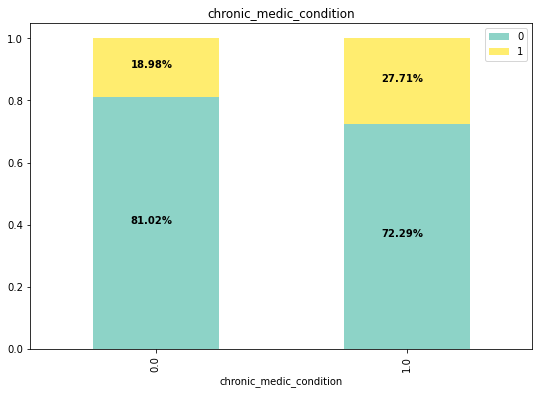

****************************************************************************************************
Feature : cont_child_undr_6_mnths


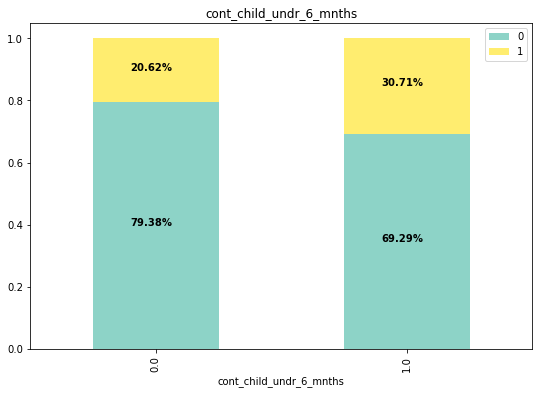

****************************************************************************************************
Feature : is_health_worker


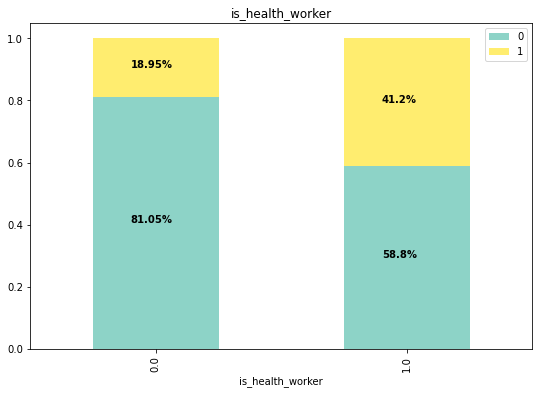

****************************************************************************************************
Feature : has_health_insur


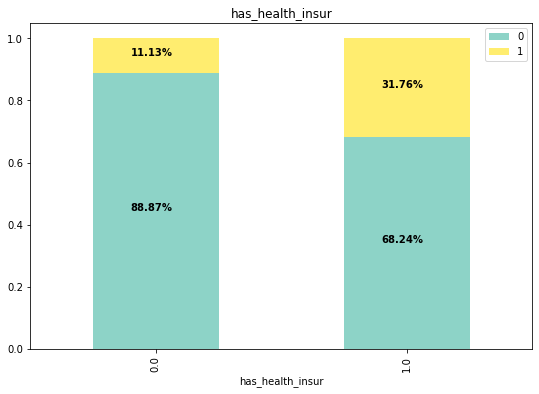

****************************************************************************************************
Feature : is_h1n1_vacc_effective


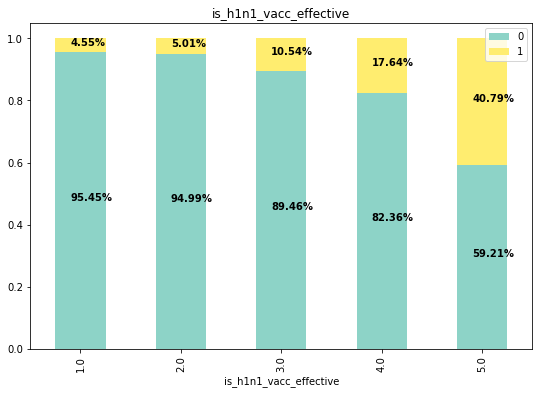

****************************************************************************************************
Feature : is_h1n1_risky


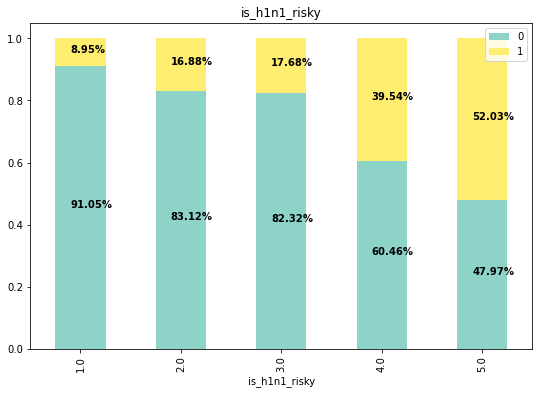

****************************************************************************************************
Feature : sick_from_h1n1_vacc


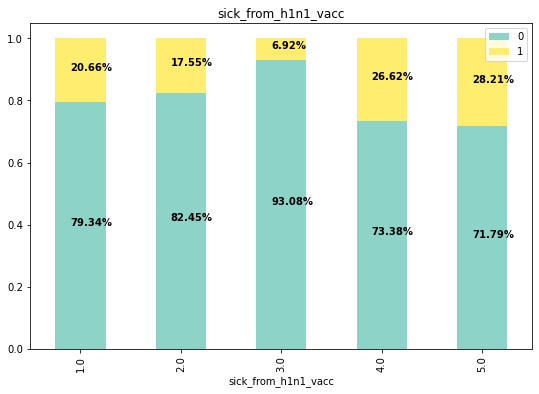

****************************************************************************************************
Feature : is_seas_vacc_effective


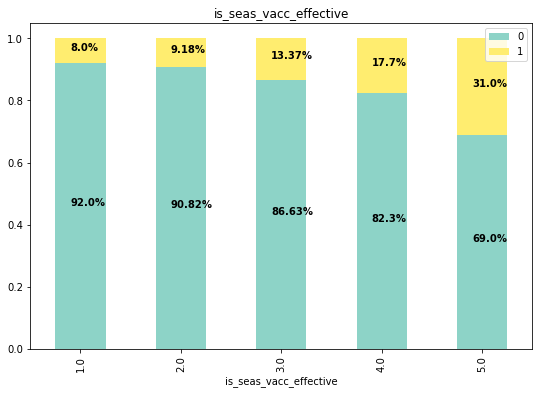

****************************************************************************************************
Feature : is_seas_risky


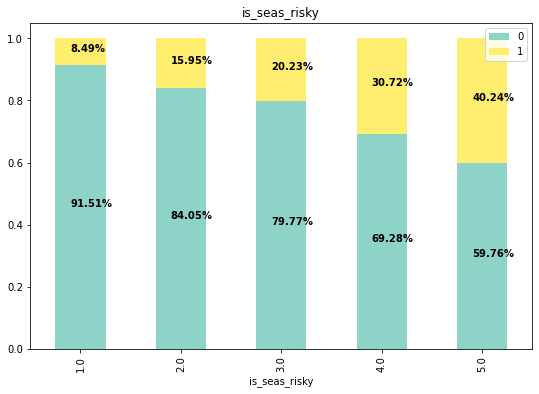

****************************************************************************************************
Feature : sick_from_seas_vacc


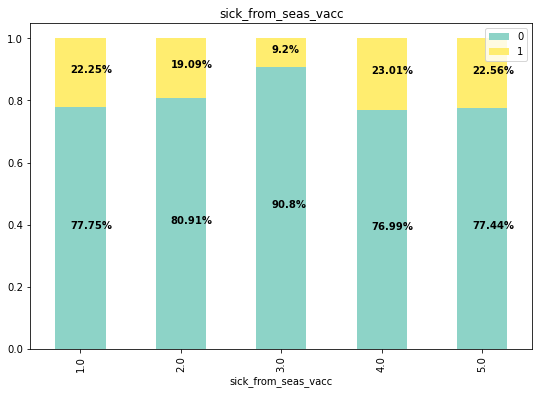

****************************************************************************************************
Feature : no_of_adults


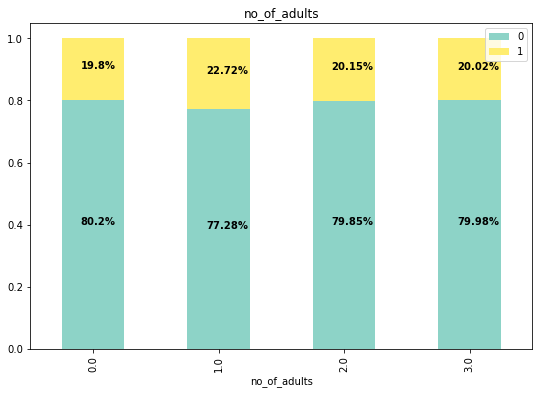

****************************************************************************************************
Feature : no_of_children


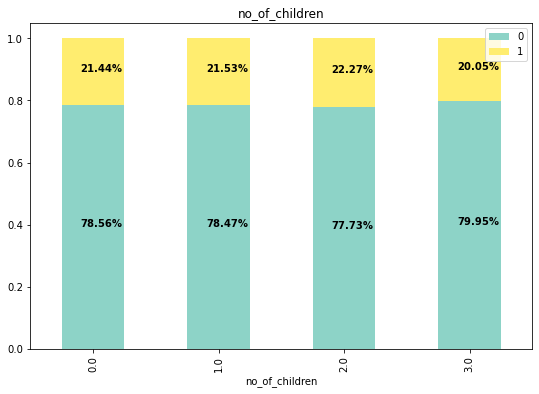

****************************************************************************************************


In [1278]:
# Percentage Stacked plot to check % wise impact of category on h1n1_vaccine

for i in num_cat:
    if i != 'h1n1_vaccine':
        print('Feature :', i)
        
        cross_tab_prop = pd.crosstab(df[i], df['h1n1_vaccine'], normalize='index')

        cross_tab_prop.plot(kind='bar', stacked=True, colormap='Set3')

        

        for n, x in enumerate([*cross_tab_prop.index.values]):

            for (proportion, y_loc) in zip(cross_tab_prop.loc[x],cross_tab_prop.loc[x].cumsum()):
                plt.text(x=(n - 0.1), y=(y_loc - proportion) + (proportion/2), s=f'{np.round(proportion*100, 2)}%', fontweight='bold')
        
        plt.title(i)
        plt.legend(loc="upper right")
        plt.show()
        print('*'*100)

In [1301]:
df['is_h1n1_vacc_effective'] = df['is_h1n1_vacc_effective'].apply(lambda x: 2 if x==1 else x)
df['is_h1n1_risky'] = df['is_h1n1_risky'].apply(lambda x: 2 if x==3 else 3 if (x==4) or (x==5) else x)
df['is_seas_risky'] = df['is_seas_risky'].apply(lambda x: 2 if x==3 else 3 if (x==4) or (x==5) else x)
df['sick_from_seas_vacc'] = df['sick_from_seas_vacc'].apply(lambda x: 2 if x==3 else 3 if (x==4) or (x==5) else x)
df['sick_from_h1n1_vacc'] = df['sick_from_h1n1_vacc'].apply(lambda x: 2 if x==3 else 3 if (x==4) or (x==5) else x)
df['is_seas_vacc_effective'] = df['is_seas_vacc_effective'].apply(lambda x: 1 if x==2 else 2 if x==3 else 3 if x==4 else 4 if x==5 else x)

# Creating Dummies

In [1302]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25336 entries, 0 to 26702
Data columns (total 33 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   h1n1_worry                 25336 non-null  float64
 1   h1n1_awareness             25336 non-null  float64
 2   antiviral_medication       25336 non-null  float64
 3   contact_avoidance          25336 non-null  float64
 4   bought_face_mask           25336 non-null  float64
 5   wash_hands_frequently      25336 non-null  float64
 6   avoid_large_gatherings     25336 non-null  float64
 7   reduced_outside_home_cont  25336 non-null  float64
 8   avoid_touch_face           25336 non-null  float64
 9   dr_recc_h1n1_vacc          25336 non-null  float64
 10  dr_recc_seasonal_vacc      25336 non-null  float64
 11  chronic_medic_condition    25336 non-null  float64
 12  cont_child_undr_6_mnths    25336 non-null  float64
 13  is_health_worker           25336 non-null  flo

In [1304]:
dummy_col = []

for i in num_cat:
    if df[i].nunique() > 2:
        dummy_col.append(i)

In [1306]:
all_dummy_col = dummy_col + str_cat

In [1307]:
all_dummy_col

['h1n1_worry',
 'h1n1_awareness',
 'is_h1n1_vacc_effective',
 'is_h1n1_risky',
 'sick_from_h1n1_vacc',
 'is_seas_vacc_effective',
 'is_seas_risky',
 'sick_from_seas_vacc',
 'no_of_adults',
 'no_of_children',
 'age_bracket',
 'qualification',
 'race',
 'sex',
 'income_level',
 'marital_status',
 'housing_status',
 'employment',
 'census_msa']

In [1308]:
dummy_df = pd.get_dummies(df, columns=all_dummy_col, drop_first=True)

In [1309]:
# to change data type of all features to uint8.

for i in dummy_df.columns:
    if dummy_df[i].dtype != type('int32'):
        dummy_df[i] = dummy_df[i].astype('int32')

In [1310]:
dummy_df.head(3)

,antiviral_medication,contact_avoidance,bought_face_mask,wash_hands_frequently,avoid_large_gatherings,reduced_outside_home_cont,avoid_touch_face,dr_recc_h1n1_vacc,dr_recc_seasonal_vacc,chronic_medic_condition,cont_child_undr_6_mnths,is_health_worker,has_health_insur,h1n1_vaccine,h1n1_worry_1.0,h1n1_worry_2.0,h1n1_worry_3.0,h1n1_awareness_1.0,h1n1_awareness_2.0,is_h1n1_vacc_effective_3.0,is_h1n1_vacc_effective_4.0,is_h1n1_vacc_effective_5.0,is_h1n1_risky_2.0,is_h1n1_risky_3.0,sick_from_h1n1_vacc_2.0,sick_from_h1n1_vacc_3.0,is_seas_vacc_effective_2.0,is_seas_vacc_effective_3.0,is_seas_vacc_effective_4.0,is_seas_risky_2.0,is_seas_risky_3.0,sick_from_seas_vacc_2.0,sick_from_seas_vacc_3.0,no_of_adults_1.0,no_of_adults_2.0,no_of_adults_3.0,no_of_children_1.0,no_of_children_2.0,no_of_children_3.0,age_bracket_55+,qualification_< 12 Years,qualification_College Graduate,qualification_Some College,race_Others,race_White,sex_Male,"income_level_> $75,000",income_level_Below Poverty,marital_status_Not Married,housing_status_Rent,employment_Unemployed,"census_msa_MSA, Principle City",census_msa_Non-MSA
0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,1,1,0,0,0,1
1,0,1,0,1,0,1,1,0,0,0,0,0,1,0,0,0,1,0,1,0,0,1,0,1,0,1,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,1,1,0,0,0
2,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,0


# Train - Test Splitting & Model Fitting

In [1311]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif

from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs

from sklearn.feature_selection import RFE
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_recall_fscore_support

In [1531]:
x = dummy_df.drop(columns=['h1n1_vaccine'])
y = dummy_df['h1n1_vaccine']

In [1532]:
x_train,x_test,y_train,y_test = train_test_split(x, y, test_size=0.3, random_state=12, stratify=y)

In [1533]:
print('X train :', x_train.shape)
print('x test :', x_test.shape)

X train : (17735, 52)
x test : (7601, 52)


## Logistic Regression

- Base Model

In [1315]:
logR = LogisticRegression(max_iter=200)

logR.fit(x_train,y_train)
y_pred = logR.predict(x_test)
y_prob = logR.predict_proba(x_test)

In [1316]:
print('Accuracy Score : ', accuracy_score(y_test, y_pred), '\n')
print('Confusion Matrix : \n', confusion_matrix(y_test,y_pred),'\n')
print('Classification Report : \n', classification_report(y_test,y_pred))

Accuracy Score :  0.8498881726088673 

Confusion Matrix : 
 [[5662  309]
 [ 832  798]] 

Classification Report : 
               precision    recall  f1-score   support

           0       0.87      0.95      0.91      5971
           1       0.72      0.49      0.58      1630

    accuracy                           0.85      7601
   macro avg       0.80      0.72      0.75      7601
weighted avg       0.84      0.85      0.84      7601



In [1319]:
k=[]

for i in y_prob[:,0]:
    if i < 0.653:
        k.append(1)
    else:
        k.append(0)

print('Accuracy Score : ', accuracy_score(y_test, k), '\n')
print('Confusion Matrix : \n', confusion_matrix(y_test,k),'\n')
print('Classification Report : \n', classification_report(y_test,k))

Accuracy Score :  0.8409419813182476 

Confusion Matrix : 
 [[5367  604]
 [ 605 1025]] 

Classification Report : 
               precision    recall  f1-score   support

           0       0.90      0.90      0.90      5971
           1       0.63      0.63      0.63      1630

    accuracy                           0.84      7601
   macro avg       0.76      0.76      0.76      7601
weighted avg       0.84      0.84      0.84      7601



### Checking VIF of each variable and removing features  to keep VIF under 10

In [1534]:
vif_data = pd.DataFrame()
vif_data['features'] = x.columns

vif_data['VIF'] = [vif(x.values,i) for i in range(len(x.columns))]

vif_data.sort_values(by='VIF', ascending=False, inplace=True, ignore_index=True)

display(vif_data)

,features,VIF
0,race_White,10.083671
1,h1n1_awareness_1.0,7.400618
2,wash_hands_frequently,7.303241
3,is_h1n1_vacc_effective_4.0,6.339727
4,h1n1_awareness_2.0,5.722916
5,is_seas_vacc_effective_4.0,5.489620
6,h1n1_worry_2.0,5.460925
7,is_seas_vacc_effective_3.0,5.288574
8,is_h1n1_vacc_effective_5.0,4.805921
9,contact_avoidance,4.653926


In [1799]:
x = dummy_df.drop(columns=['h1n1_vaccine','wash_hands_frequently','contact_avoidance','is_seas_risky_3.0','no_of_adults_1.0',
                           'qualification_College Graduate','sick_from_h1n1_vacc_3.0'])

y = dummy_df['h1n1_vaccine']

In [1800]:
# vif is calculated on each step iteratively after removing a feature to keep vif factor under 10.

vif_data = pd.DataFrame()
vif_data['features'] = x.columns

vif_data['VIF'] = [vif(x.values,i) for i in range(len(x.columns))]

vif_data.sort_values(by='VIF', ascending=False, inplace=True, ignore_index=True)

display(vif_data)

,features,VIF
0,race_White,9.564389
1,h1n1_awareness_1.0,6.963642
2,is_h1n1_vacc_effective_4.0,6.259629
3,h1n1_awareness_2.0,5.266046
4,is_seas_vacc_effective_4.0,5.252161
5,is_seas_vacc_effective_3.0,5.189362
6,h1n1_worry_2.0,5.101999
7,is_h1n1_vacc_effective_5.0,4.750265
8,h1n1_worry_1.0,3.690484
9,avoid_touch_face,3.607643


In [1801]:
x_train,x_test,y_train,y_test = train_test_split(x, y, test_size=0.3, random_state=12, stratify=y)

In [1802]:
print('X train :', x_train.shape)
print('x test :', x_test.shape)

X train : (17735, 46)
x test : (7601, 46)


- Model Fitting

In [1803]:
logR = LogisticRegression(max_iter=200)

logR.fit(x_train,y_train)
y_pred = logR.predict(x_test)
y_prob = logR.predict_proba(x_test)

In [1804]:
print('Accuracy Score : ', accuracy_score(y_test, y_pred), '\n')
print('Confusion Matrix : \n', confusion_matrix(y_test,y_pred),'\n')
print('Classification Report : \n', classification_report(y_test,y_pred))

Accuracy Score :  0.8521247204315222 

Confusion Matrix : 
 [[5666  305]
 [ 819  811]] 

Classification Report : 
               precision    recall  f1-score   support

           0       0.87      0.95      0.91      5971
           1       0.73      0.50      0.59      1630

    accuracy                           0.85      7601
   macro avg       0.80      0.72      0.75      7601
weighted avg       0.84      0.85      0.84      7601



In [1805]:
k=[]

for i in y_prob[:,0]:
    if i < 0.654:
        k.append(1)
    else:
        k.append(0)

print('Accuracy Score : ', accuracy_score(y_test, k), '\n')
print('Confusion Matrix : \n', confusion_matrix(y_test,k),'\n')
print('Classification Report : \n', classification_report(y_test,k))

Accuracy Score :  0.8383107485857124 

Confusion Matrix : 
 [[5356  615]
 [ 614 1016]] 

Classification Report : 
               precision    recall  f1-score   support

           0       0.90      0.90      0.90      5971
           1       0.62      0.62      0.62      1630

    accuracy                           0.84      7601
   macro avg       0.76      0.76      0.76      7601
weighted avg       0.84      0.84      0.84      7601



### Using Sequentional Feature Selection to get optimum features for prediction

In [1417]:
x = dummy_df.drop(columns=['h1n1_vaccine'])
y = dummy_df['h1n1_vaccine']

x_train,x_test,y_train,y_test = train_test_split(x, y, test_size=0.3, random_state=12, stratify=y)

In [1418]:
print('X train :', x_train.shape)
print('x test :', x_test.shape)

X train : (17735, 52)
x test : (7601, 52)


In [1820]:
sfs1 = SFS(LogisticRegression(max_iter=400), k_features= (4,44), forward=False, floating=False, cv=10,
           verbose=2, scoring='roc_auc')

sfs1.fit(x_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  46 out of  46 | elapsed:   51.6s finished

[2022-04-02 18:48:05] Features: 45/4 -- score: 0.8592441254236075[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  45 out of  45 | elapsed:   48.3s finished

[2022-04-02 18:48:53] Features: 44/4 -- score: 0.8593613783741383[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  44 out of  44 | elapsed:   47.8s finished

[2022-04-02 18:49:41] Features: 43/4 -- score: 0.859475976866371[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.6s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  18 out of  18 | elapsed:   11.6s finished

[2022-04-02 19:01:13] Features: 17/4 -- score: 0.8598555570687358[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  17 out of  17 | elapsed:    9.4s finished

[2022-04-02 19:01:23] Features: 16/4 -- score: 0.8596331100964629[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  16 out of  16 | elapsed:    8.8s finished

[2022-04-02 19:01:32] Features: 15/4 -- score: 0.8594000802156051[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  1

SequentialFeatureSelector(cv=10, estimator=LogisticRegression(max_iter=400),
                          forward=False, k_features=(4, 44), scoring='roc_auc',
                          verbose=2)

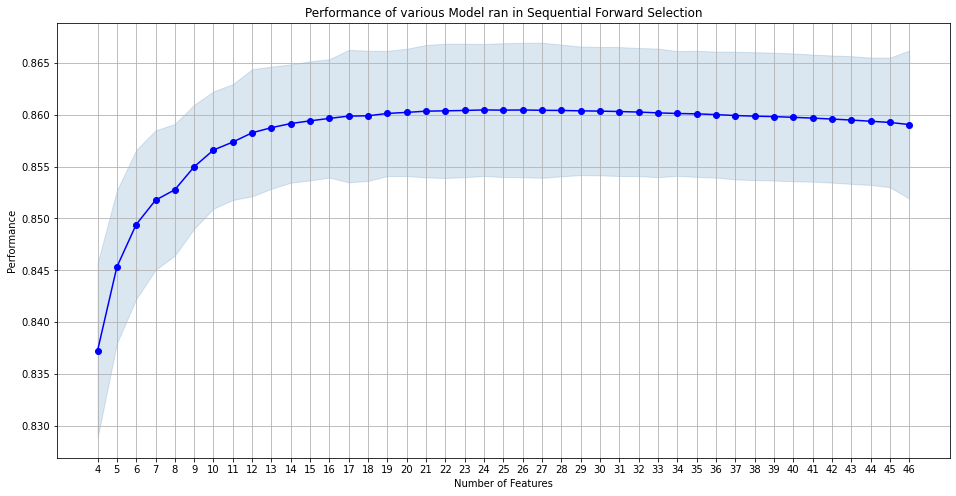

In [1829]:
plt.rcParams['figure.figsize'] = (16,8)

fig1 = plot_sfs(sfs1.get_metric_dict())
plt.title('Performance of various Model ran in Sequential Forward Selection')
plt.grid()
plt.show()

In [1822]:
# Creating Dataframe representing performance of Features in SFS 

sfs1_df = pd.DataFrame(sfs1.get_metric_dict()).T.reset_index()

display(sfs1_df)

,index,feature_idx,cv_scores,avg_score,feature_names,ci_bound,std_dev,std_err
0,46,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[0.8546293522354931, 0.8621434883453639, 0.848...",0.859043,"(antiviral_medication, bought_face_mask, avoid...",0.00529796,0.00713325,0.00237775
1,45,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[0.8542204837460644, 0.8615631588764973, 0.851...",0.859244,"(antiviral_medication, bought_face_mask, avoid...",0.00463177,0.00623628,0.00207876
2,44,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[0.8545634057049402, 0.8618928915292624, 0.851...",0.859361,"(antiviral_medication, bought_face_mask, avoid...",0.00455792,0.00613686,0.00204562
3,43,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[0.8545294903463699, 0.8617949138267265, 0.852...",0.859476,"(antiviral_medication, bought_face_mask, avoid...",0.00456785,0.00615022,0.00205007
4,42,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[0.8550250314188114, 0.8618062189462496, 0.852...",0.859571,"(antiviral_medication, bought_face_mask, avoid...",0.00454787,0.00612332,0.00204111
5,41,"(0, 1, 2, 3, 5, 6, 7, 8, 9, 10, 11, 12, 13, 15...","[0.8551512719201557, 0.8618797022231518, 0.852...",0.859662,"(antiviral_medication, bought_face_mask, avoid...",0.004546,0.0061208,0.00204027
6,40,"(0, 1, 2, 3, 5, 6, 7, 8, 9, 10, 11, 12, 13, 15...","[0.855211565890947, 0.8619418803805304, 0.8522...",0.859738,"(antiviral_medication, bought_face_mask, avoid...",0.00457144,0.00615505,0.00205168
7,39,"(0, 1, 2, 3, 5, 6, 7, 8, 9, 10, 11, 12, 13, 15...","[0.855260554742215, 0.8621246464794916, 0.8523...",0.859806,"(antiviral_medication, bought_face_mask, avoid...",0.00457065,0.00615399,0.00205133
8,38,"(0, 1, 2, 5, 6, 7, 8, 9, 10, 11, 12, 13, 15, 1...","[0.8554678152668103, 0.8621340674124278, 0.852...",0.859852,"(antiviral_medication, bought_face_mask, avoid...",0.00457525,0.00616018,0.00205339
9,37,"(0, 1, 2, 5, 6, 7, 8, 9, 10, 11, 12, 15, 16, 1...","[0.8555526036632356, 0.8620643525087002, 0.852...",0.859909,"(antiviral_medication, bought_face_mask, avoid...",0.00456419,0.0061453,0.00204843


In [1823]:
# Best score at 

sfs1_df.iloc[sfs1_df['avg_score'].astype('float').idxmax()].to_frame()

,22
index,24
feature_idx,"(1, 2, 5, 6, 7, 8, 9, 10, 12, 15, 16, 17, 18, ..."
cv_scores,"[0.855363242911219, 0.8626314926714562, 0.8528..."
avg_score,0.86045
feature_names,"(bought_face_mask, avoid_large_gatherings, dr_..."
ci_bound,0.00472142
std_dev,0.00635699
std_err,0.002119


In [1824]:
sfs_features = list(sfs1_df.iloc[22][4])

In [1825]:
x = dummy_df[sfs_features]
y = dummy_df['h1n1_vaccine']

x_train,x_test,y_train,y_test = train_test_split(x, y, test_size=0.3, random_state=12, stratify=y)

print('X train :', x_train.shape)
print('x test :', x_test.shape)

X train : (17735, 24)
x test : (7601, 24)


In [1831]:
logR = LogisticRegression(max_iter=200)

logR.fit(x_train,y_train)
y_pred = logR.predict(x_test)
y_prob = logR.predict_proba(x_test)

In [1832]:
print('Accuracy Score : ', accuracy_score(y_test, y_pred), '\n')
print('Confusion Matrix : \n', confusion_matrix(y_test,y_pred),'\n')
print('Classification Report : \n', classification_report(y_test,y_pred))

Accuracy Score :  0.8504144191553743 

Confusion Matrix : 
 [[5656  315]
 [ 822  808]] 

Classification Report : 
               precision    recall  f1-score   support

           0       0.87      0.95      0.91      5971
           1       0.72      0.50      0.59      1630

    accuracy                           0.85      7601
   macro avg       0.80      0.72      0.75      7601
weighted avg       0.84      0.85      0.84      7601



In [1835]:
k=[]

for i in y_prob[:,0]:
    if i < 0.658:
        k.append(1)
    else:
        k.append(0)

print('Accuracy Score : ', accuracy_score(y_test, k), '\n')
print('Confusion Matrix : \n', confusion_matrix(y_test,k),'\n')
print('Classification Report : \n', classification_report(y_test,k))

Accuracy Score :  0.8372582554926983 

Confusion Matrix : 
 [[5352  619]
 [ 618 1012]] 

Classification Report : 
               precision    recall  f1-score   support

           0       0.90      0.90      0.90      5971
           1       0.62      0.62      0.62      1630

    accuracy                           0.84      7601
   macro avg       0.76      0.76      0.76      7601
weighted avg       0.84      0.84      0.84      7601



## Random Forest

In [1442]:
rf_df = df.copy()

In [1443]:
for i in str_cat:
    le = LabelEncoder()
    le.fit(rf_df[i])
    rf_df[i] = le.transform(rf_df[i])

In [1444]:
for i in rf_df.columns:
    rf_df[i] = rf_df[i].astype('str')

In [1445]:
x = rf_df.drop(columns=['h1n1_vaccine'])
y = rf_df['h1n1_vaccine']

In [1446]:
x_train,x_test,y_train,y_test = train_test_split(x, y, test_size=0.3, random_state=12, stratify=y)

In [1447]:
print('X train :', x_train.shape)
print('x test :', x_test.shape)

X train : (17735, 32)
x test : (7601, 32)


### Creating Model Using All Features

- Baseline

In [1456]:
rf = RandomForestClassifier(n_estimators=800)

rf.fit(x_train,y_train)
y_pred = rf.predict(x_test)
y_prob = rf.predict_proba(x_test)

In [1457]:
print('Accuracy Score : ', accuracy_score(y_test, y_pred), '\n')
print('Confusion Matrix : \n', confusion_matrix(y_test,y_pred),'\n')
print('Classification Report : \n', classification_report(y_test,y_pred))

Accuracy Score :  0.8485725562425996 

Confusion Matrix : 
 [[5722  249]
 [ 902  728]] 

Classification Report : 
               precision    recall  f1-score   support

           0       0.86      0.96      0.91      5971
           1       0.75      0.45      0.56      1630

    accuracy                           0.85      7601
   macro avg       0.80      0.70      0.73      7601
weighted avg       0.84      0.85      0.83      7601



In [1464]:
k=[]

for i in y_prob[:,0]:
    if i < 0.645:
        k.append('1')
    else:
        k.append(0)

print('Accuracy Score : ', accuracy_score(y_test, k), '\n')
print('Confusion Matrix : \n', confusion_matrix(y_test,k),'\n')
print('Classification Report : \n', classification_report(y_test,k))

Accuracy Score :  0.8375213787659519 

Confusion Matrix : 
 [[5354  617]
 [ 618 1012]] 

Classification Report : 
               precision    recall  f1-score   support

           0       0.90      0.90      0.90      5971
           1       0.62      0.62      0.62      1630

    accuracy                           0.84      7601
   macro avg       0.76      0.76      0.76      7601
weighted avg       0.84      0.84      0.84      7601



In [1469]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 400, stop = 1000, num = 4)]

# Maximum number of levels in tree
max_depth = [5, 6, 7, 9, 11]

# Maximum Features
max_features = [int(x) for x in np.linspace(3, 10, num = 5)]

params = {'n_estimators': n_estimators,
          'max_depth': max_depth,
          'max_features': max_features}

print(params)

{'n_estimators': [400, 600, 800, 1000], 'max_depth': [5, 6, 7, 9, 11], 'max_features': [3, 4, 6, 8, 10]}


In [1470]:
rf_grid = GridSearchCV(RandomForestClassifier(), param_grid=params, cv=4, verbose=2)

rf_grid.fit(x_train,y_train)

Fitting 4 folds for each of 100 candidates, totalling 400 fits
[CV] max_depth=5, max_features=3, n_estimators=400 ...................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] .... max_depth=5, max_features=3, n_estimators=400, total=   1.4s
[CV] max_depth=5, max_features=3, n_estimators=400 ...................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.3s remaining:    0.0s


[CV] .... max_depth=5, max_features=3, n_estimators=400, total=   1.4s
[CV] max_depth=5, max_features=3, n_estimators=400 ...................
[CV] .... max_depth=5, max_features=3, n_estimators=400, total=   1.4s
[CV] max_depth=5, max_features=3, n_estimators=400 ...................
[CV] .... max_depth=5, max_features=3, n_estimators=400, total=   1.4s
[CV] max_depth=5, max_features=3, n_estimators=600 ...................
[CV] .... max_depth=5, max_features=3, n_estimators=600, total=   2.0s
[CV] max_depth=5, max_features=3, n_estimators=600 ...................
[CV] .... max_depth=5, max_features=3, n_estimators=600, total=   2.0s
[CV] max_depth=5, max_features=3, n_estimators=600 ...................
[CV] .... max_depth=5, max_features=3, n_estimators=600, total=   2.1s
[CV] max_depth=5, max_features=3, n_estimators=600 ...................
[CV] .... max_depth=5, max_features=3, n_estimators=600, total=   2.1s
[CV] max_depth=5, max_features=3, n_estimators=800 ...................
[CV] .

[CV] .... max_depth=5, max_features=8, n_estimators=800, total=   4.1s
[CV] max_depth=5, max_features=8, n_estimators=1000 ..................
[CV] ... max_depth=5, max_features=8, n_estimators=1000, total=   5.1s
[CV] max_depth=5, max_features=8, n_estimators=1000 ..................
[CV] ... max_depth=5, max_features=8, n_estimators=1000, total=   5.1s
[CV] max_depth=5, max_features=8, n_estimators=1000 ..................
[CV] ... max_depth=5, max_features=8, n_estimators=1000, total=   5.1s
[CV] max_depth=5, max_features=8, n_estimators=1000 ..................
[CV] ... max_depth=5, max_features=8, n_estimators=1000, total=   5.1s
[CV] max_depth=5, max_features=10, n_estimators=400 ..................
[CV] ... max_depth=5, max_features=10, n_estimators=400, total=   2.4s
[CV] max_depth=5, max_features=10, n_estimators=400 ..................
[CV] ... max_depth=5, max_features=10, n_estimators=400, total=   2.4s
[CV] max_depth=5, max_features=10, n_estimators=400 ..................
[CV] .

[CV] .... max_depth=6, max_features=6, n_estimators=600, total=   3.0s
[CV] max_depth=6, max_features=6, n_estimators=600 ...................
[CV] .... max_depth=6, max_features=6, n_estimators=600, total=   3.0s
[CV] max_depth=6, max_features=6, n_estimators=600 ...................
[CV] .... max_depth=6, max_features=6, n_estimators=600, total=   3.1s
[CV] max_depth=6, max_features=6, n_estimators=800 ...................
[CV] .... max_depth=6, max_features=6, n_estimators=800, total=   4.0s
[CV] max_depth=6, max_features=6, n_estimators=800 ...................
[CV] .... max_depth=6, max_features=6, n_estimators=800, total=   3.9s
[CV] max_depth=6, max_features=6, n_estimators=800 ...................
[CV] .... max_depth=6, max_features=6, n_estimators=800, total=   4.0s
[CV] max_depth=6, max_features=6, n_estimators=800 ...................
[CV] .... max_depth=6, max_features=6, n_estimators=800, total=   4.0s
[CV] max_depth=6, max_features=6, n_estimators=1000 ..................
[CV] .

[CV] ... max_depth=7, max_features=3, n_estimators=1000, total=   3.9s
[CV] max_depth=7, max_features=4, n_estimators=400 ...................
[CV] .... max_depth=7, max_features=4, n_estimators=400, total=   1.9s
[CV] max_depth=7, max_features=4, n_estimators=400 ...................
[CV] .... max_depth=7, max_features=4, n_estimators=400, total=   1.9s
[CV] max_depth=7, max_features=4, n_estimators=400 ...................
[CV] .... max_depth=7, max_features=4, n_estimators=400, total=   1.9s
[CV] max_depth=7, max_features=4, n_estimators=400 ...................
[CV] .... max_depth=7, max_features=4, n_estimators=400, total=   1.9s
[CV] max_depth=7, max_features=4, n_estimators=600 ...................
[CV] .... max_depth=7, max_features=4, n_estimators=600, total=   2.8s
[CV] max_depth=7, max_features=4, n_estimators=600 ...................
[CV] .... max_depth=7, max_features=4, n_estimators=600, total=   2.7s
[CV] max_depth=7, max_features=4, n_estimators=600 ...................
[CV] .

[CV] ... max_depth=7, max_features=10, n_estimators=800, total=   5.9s
[CV] max_depth=7, max_features=10, n_estimators=800 ..................
[CV] ... max_depth=7, max_features=10, n_estimators=800, total=   5.9s
[CV] max_depth=7, max_features=10, n_estimators=800 ..................
[CV] ... max_depth=7, max_features=10, n_estimators=800, total=   6.0s
[CV] max_depth=7, max_features=10, n_estimators=1000 .................
[CV] .. max_depth=7, max_features=10, n_estimators=1000, total=   7.4s
[CV] max_depth=7, max_features=10, n_estimators=1000 .................
[CV] .. max_depth=7, max_features=10, n_estimators=1000, total=   7.4s
[CV] max_depth=7, max_features=10, n_estimators=1000 .................
[CV] .. max_depth=7, max_features=10, n_estimators=1000, total=   7.4s
[CV] max_depth=7, max_features=10, n_estimators=1000 .................
[CV] .. max_depth=7, max_features=10, n_estimators=1000, total=   7.3s
[CV] max_depth=9, max_features=3, n_estimators=400 ...................
[CV] .

[CV] .... max_depth=9, max_features=8, n_estimators=400, total=   3.2s
[CV] max_depth=9, max_features=8, n_estimators=600 ...................
[CV] .... max_depth=9, max_features=8, n_estimators=600, total=   4.8s
[CV] max_depth=9, max_features=8, n_estimators=600 ...................
[CV] .... max_depth=9, max_features=8, n_estimators=600, total=   4.8s
[CV] max_depth=9, max_features=8, n_estimators=600 ...................
[CV] .... max_depth=9, max_features=8, n_estimators=600, total=   4.9s
[CV] max_depth=9, max_features=8, n_estimators=600 ...................
[CV] .... max_depth=9, max_features=8, n_estimators=600, total=   4.8s
[CV] max_depth=9, max_features=8, n_estimators=800 ...................
[CV] .... max_depth=9, max_features=8, n_estimators=800, total=   6.3s
[CV] max_depth=9, max_features=8, n_estimators=800 ...................
[CV] .... max_depth=9, max_features=8, n_estimators=800, total=   6.3s
[CV] max_depth=9, max_features=8, n_estimators=800 ...................
[CV] .

[CV] .. max_depth=11, max_features=4, n_estimators=1000, total=   6.4s
[CV] max_depth=11, max_features=4, n_estimators=1000 .................
[CV] .. max_depth=11, max_features=4, n_estimators=1000, total=   6.4s
[CV] max_depth=11, max_features=4, n_estimators=1000 .................
[CV] .. max_depth=11, max_features=4, n_estimators=1000, total=   6.4s
[CV] max_depth=11, max_features=6, n_estimators=400 ..................
[CV] ... max_depth=11, max_features=6, n_estimators=400, total=   3.2s
[CV] max_depth=11, max_features=6, n_estimators=400 ..................
[CV] ... max_depth=11, max_features=6, n_estimators=400, total=   3.2s
[CV] max_depth=11, max_features=6, n_estimators=400 ..................
[CV] ... max_depth=11, max_features=6, n_estimators=400, total=   3.2s
[CV] max_depth=11, max_features=6, n_estimators=400 ..................
[CV] ... max_depth=11, max_features=6, n_estimators=400, total=   3.2s
[CV] max_depth=11, max_features=6, n_estimators=600 ..................
[CV] .

[Parallel(n_jobs=1)]: Done 400 out of 400 | elapsed: 28.2min finished


GridSearchCV(cv=4, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [5, 6, 7, 9, 11],
                         'max_features': [3, 4, 6, 8, 10],
                         'n_estimators': [400, 600, 800, 1000]},
             verbose=2)

In [1471]:
rf_grid.best_params_

{'max_depth': 9, 'max_features': 8, 'n_estimators': 400}

In [1472]:
rf_grid = RandomForestClassifier(max_depth= 9, max_features= 8, n_estimators= 400)

rf_grid.fit(x_train,y_train)
y_pred = rf_grid.predict(x_test)
y_prob = rf_grid.predict_proba(x_test)

In [1473]:
print('Accuracy Score : ', accuracy_score(y_test, y_pred), '\n')
print('Confusion Matrix : \n', confusion_matrix(y_test,y_pred),'\n')
print('Classification Report : \n', classification_report(y_test,y_pred))

Accuracy Score :  0.8504144191553743 

Confusion Matrix : 
 [[5734  237]
 [ 900  730]] 

Classification Report : 
               precision    recall  f1-score   support

           0       0.86      0.96      0.91      5971
           1       0.75      0.45      0.56      1630

    accuracy                           0.85      7601
   macro avg       0.81      0.70      0.74      7601
weighted avg       0.84      0.85      0.84      7601



In [1476]:
k=[]

for i in y_prob[:,0]:
    if i < 0.651:
        k.append('1')
    else:
        k.append(0)

print('Accuracy Score : ', accuracy_score(y_test, k), '\n')
print('Confusion Matrix : \n', confusion_matrix(y_test,k),'\n')
print('Classification Report : \n', classification_report(y_test,k))

Accuracy Score :  0.8402841731351138 

Confusion Matrix : 
 [[5363  608]
 [ 606 1024]] 

Classification Report : 
               precision    recall  f1-score   support

           0       0.90      0.90      0.90      5971
           1       0.63      0.63      0.63      1630

    accuracy                           0.84      7601
   macro avg       0.76      0.76      0.76      7601
weighted avg       0.84      0.84      0.84      7601



### Creating RF Model with only the Most Important Features

- Extracting Important Features

In [1477]:
# feature importance

pd.DataFrame(rf.feature_importances_, index = x_train.columns, 
             columns = ['importance']).sort_values(by = 'importance', ascending = False)

,importance
dr_recc_h1n1_vacc,0.102131
is_h1n1_risky,0.072223
has_health_insur,0.066833
is_h1n1_vacc_effective,0.065283
qualification,0.041855
h1n1_worry,0.041447
is_seas_risky,0.040198
census_msa,0.038930
is_seas_vacc_effective,0.036070
sick_from_h1n1_vacc,0.035675


In [1478]:
# features with importance of more than 0.019

sfm_Imp_f = SelectFromModel(rf, threshold=0.019)

sfm_Imp_f.fit(x_train, y_train)

SelectFromModel(estimator=RandomForestClassifier(n_estimators=800),
                threshold=0.019)

In [1479]:
sfm_Imp_f.get_support(indices=True)

array([ 0,  1,  6,  7,  8,  9, 10, 11, 13, 14, 15, 16, 17, 18, 19, 20, 21,
       22, 23, 24, 25, 26, 29, 30, 31], dtype=int64)

In [1480]:
# names of the most important features
sfm_col = []

for i in sfm_Imp_f.get_support(indices=True):
    sfm_col.append(x.columns[i])

len(sfm_col)

25

In [1481]:
# Transforming both train and test set to create a new dataset containing only the most important features

x_imp_train = sfm_Imp_f.transform(x_train)
x_imp_test = sfm_Imp_f.transform(x_test)

- Using GridSearchCV to get best HyperParameters

In [1490]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 600, stop = 1200, num = 4)]

# Maximum number of levels in tree
max_depth = [5, 6, 7, 9, 10]

# Maximum Features
max_features = [int(x) for x in np.linspace(4, 10, num = 4)]

params = {'n_estimators': n_estimators,
          'max_depth': max_depth,
          'max_features': max_features}

print(params)

{'n_estimators': [600, 800, 1000, 1200], 'max_depth': [5, 6, 7, 9, 10], 'max_features': [4, 6, 8, 10]}


In [1491]:
rf_grid = GridSearchCV(RandomForestClassifier(), param_grid=params, cv=4, verbose=2)

rf_grid.fit(x_imp_train,y_train)

Fitting 4 folds for each of 80 candidates, totalling 320 fits
[CV] max_depth=5, max_features=4, n_estimators=600 ...................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] .... max_depth=5, max_features=4, n_estimators=600, total=   3.1s
[CV] max_depth=5, max_features=4, n_estimators=600 ...................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.0s remaining:    0.0s


[CV] .... max_depth=5, max_features=4, n_estimators=600, total=   3.1s
[CV] max_depth=5, max_features=4, n_estimators=600 ...................
[CV] .... max_depth=5, max_features=4, n_estimators=600, total=   3.0s
[CV] max_depth=5, max_features=4, n_estimators=600 ...................
[CV] .... max_depth=5, max_features=4, n_estimators=600, total=   2.6s
[CV] max_depth=5, max_features=4, n_estimators=800 ...................
[CV] .... max_depth=5, max_features=4, n_estimators=800, total=   3.4s
[CV] max_depth=5, max_features=4, n_estimators=800 ...................
[CV] .... max_depth=5, max_features=4, n_estimators=800, total=   3.4s
[CV] max_depth=5, max_features=4, n_estimators=800 ...................
[CV] .... max_depth=5, max_features=4, n_estimators=800, total=   3.4s
[CV] max_depth=5, max_features=4, n_estimators=800 ...................
[CV] .... max_depth=5, max_features=4, n_estimators=800, total=   3.7s
[CV] max_depth=5, max_features=4, n_estimators=1000 ..................
[CV] .

[CV] .. max_depth=5, max_features=10, n_estimators=1000, total=   6.5s
[CV] max_depth=5, max_features=10, n_estimators=1200 .................
[CV] .. max_depth=5, max_features=10, n_estimators=1200, total=   7.8s
[CV] max_depth=5, max_features=10, n_estimators=1200 .................
[CV] .. max_depth=5, max_features=10, n_estimators=1200, total=   7.8s
[CV] max_depth=5, max_features=10, n_estimators=1200 .................
[CV] .. max_depth=5, max_features=10, n_estimators=1200, total=   7.8s
[CV] max_depth=5, max_features=10, n_estimators=1200 .................
[CV] .. max_depth=5, max_features=10, n_estimators=1200, total=   7.8s
[CV] max_depth=6, max_features=4, n_estimators=600 ...................
[CV] .... max_depth=6, max_features=4, n_estimators=600, total=   2.8s
[CV] max_depth=6, max_features=4, n_estimators=600 ...................
[CV] .... max_depth=6, max_features=4, n_estimators=600, total=   2.8s
[CV] max_depth=6, max_features=4, n_estimators=600 ...................
[CV] .

[CV] ... max_depth=6, max_features=10, n_estimators=800, total=   5.9s
[CV] max_depth=6, max_features=10, n_estimators=800 ..................
[CV] ... max_depth=6, max_features=10, n_estimators=800, total=   5.9s
[CV] max_depth=6, max_features=10, n_estimators=800 ..................
[CV] ... max_depth=6, max_features=10, n_estimators=800, total=   5.9s
[CV] max_depth=6, max_features=10, n_estimators=1000 .................
[CV] .. max_depth=6, max_features=10, n_estimators=1000, total=   7.3s
[CV] max_depth=6, max_features=10, n_estimators=1000 .................
[CV] .. max_depth=6, max_features=10, n_estimators=1000, total=   7.3s
[CV] max_depth=6, max_features=10, n_estimators=1000 .................
[CV] .. max_depth=6, max_features=10, n_estimators=1000, total=   7.3s
[CV] max_depth=6, max_features=10, n_estimators=1000 .................
[CV] .. max_depth=6, max_features=10, n_estimators=1000, total=   7.3s
[CV] max_depth=6, max_features=10, n_estimators=1200 .................
[CV] .

[CV] ... max_depth=7, max_features=8, n_estimators=1200, total=   8.5s
[CV] max_depth=7, max_features=10, n_estimators=600 ..................
[CV] ... max_depth=7, max_features=10, n_estimators=600, total=   4.9s
[CV] max_depth=7, max_features=10, n_estimators=600 ..................
[CV] ... max_depth=7, max_features=10, n_estimators=600, total=   5.0s
[CV] max_depth=7, max_features=10, n_estimators=600 ..................
[CV] ... max_depth=7, max_features=10, n_estimators=600, total=   5.0s
[CV] max_depth=7, max_features=10, n_estimators=600 ..................
[CV] ... max_depth=7, max_features=10, n_estimators=600, total=   5.0s
[CV] max_depth=7, max_features=10, n_estimators=800 ..................
[CV] ... max_depth=7, max_features=10, n_estimators=800, total=   6.5s
[CV] max_depth=7, max_features=10, n_estimators=800 ..................
[CV] ... max_depth=7, max_features=10, n_estimators=800, total=   6.6s
[CV] max_depth=7, max_features=10, n_estimators=800 ..................
[CV] .

[CV] ... max_depth=9, max_features=8, n_estimators=1000, total=   8.7s
[CV] max_depth=9, max_features=8, n_estimators=1000 ..................
[CV] ... max_depth=9, max_features=8, n_estimators=1000, total=   8.7s
[CV] max_depth=9, max_features=8, n_estimators=1000 ..................
[CV] ... max_depth=9, max_features=8, n_estimators=1000, total=   8.7s
[CV] max_depth=9, max_features=8, n_estimators=1200 ..................
[CV] ... max_depth=9, max_features=8, n_estimators=1200, total=  10.5s
[CV] max_depth=9, max_features=8, n_estimators=1200 ..................
[CV] ... max_depth=9, max_features=8, n_estimators=1200, total=  10.5s
[CV] max_depth=9, max_features=8, n_estimators=1200 ..................
[CV] ... max_depth=9, max_features=8, n_estimators=1200, total=  10.6s
[CV] max_depth=9, max_features=8, n_estimators=1200 ..................
[CV] ... max_depth=9, max_features=8, n_estimators=1200, total=  10.5s
[CV] max_depth=9, max_features=10, n_estimators=600 ..................
[CV] .

[CV] ... max_depth=10, max_features=8, n_estimators=600, total=   5.8s
[CV] max_depth=10, max_features=8, n_estimators=800 ..................
[CV] ... max_depth=10, max_features=8, n_estimators=800, total=   7.7s
[CV] max_depth=10, max_features=8, n_estimators=800 ..................
[CV] ... max_depth=10, max_features=8, n_estimators=800, total=   7.7s
[CV] max_depth=10, max_features=8, n_estimators=800 ..................
[CV] ... max_depth=10, max_features=8, n_estimators=800, total=   7.7s
[CV] max_depth=10, max_features=8, n_estimators=800 ..................
[CV] ... max_depth=10, max_features=8, n_estimators=800, total=   7.8s
[CV] max_depth=10, max_features=8, n_estimators=1000 .................
[CV] .. max_depth=10, max_features=8, n_estimators=1000, total=   9.8s
[CV] max_depth=10, max_features=8, n_estimators=1000 .................
[CV] .. max_depth=10, max_features=8, n_estimators=1000, total=   9.9s
[CV] max_depth=10, max_features=8, n_estimators=1000 .................
[CV] .

[Parallel(n_jobs=1)]: Done 320 out of 320 | elapsed: 33.9min finished


GridSearchCV(cv=4, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [5, 6, 7, 9, 10],
                         'max_features': [4, 6, 8, 10],
                         'n_estimators': [600, 800, 1000, 1200]},
             verbose=2)

In [1493]:
rf_grid.best_params_

{'max_depth': 9, 'max_features': 6, 'n_estimators': 600}

In [1494]:
grid_sfm_rf = RandomForestClassifier(max_depth= 9, max_features= 6, n_estimators= 600)

grid_sfm_rf.fit(x_imp_train,y_train)
y_pred = grid_sfm_rf.predict(x_imp_test)
y_prob = grid_sfm_rf.predict_proba(x_imp_test)

In [1495]:
print('Accuracy Score : ', accuracy_score(y_test, y_pred), '\n')
print('Confusion Matrix : \n', confusion_matrix(y_test,y_pred),'\n')
print('Classification Report : \n', classification_report(y_test,y_pred))

Accuracy Score :  0.8512037889751348 

Confusion Matrix : 
 [[5735  236]
 [ 895  735]] 

Classification Report : 
               precision    recall  f1-score   support

           0       0.87      0.96      0.91      5971
           1       0.76      0.45      0.57      1630

    accuracy                           0.85      7601
   macro avg       0.81      0.71      0.74      7601
weighted avg       0.84      0.85      0.84      7601



In [1500]:
k=[]

for i in y_prob[:,0]:
    if i < 0.653:
        k.append('1')
    else:
        k.append(0)

print('Accuracy Score : ', accuracy_score(y_test, k), '\n')
print('Confusion Matrix : \n', confusion_matrix(y_test,k),'\n')
print('Classification Report : \n', classification_report(y_test,k))

Accuracy Score :  0.8404157347717406 

Confusion Matrix : 
 [[5364  607]
 [ 606 1024]] 

Classification Report : 
               precision    recall  f1-score   support

           0       0.90      0.90      0.90      5971
           1       0.63      0.63      0.63      1630

    accuracy                           0.84      7601
   macro avg       0.76      0.76      0.76      7601
weighted avg       0.84      0.84      0.84      7601



## Gradient Boosting Classifier

In [1501]:
x = dummy_df.drop(columns=['h1n1_vaccine'])
y = dummy_df['h1n1_vaccine']

In [1502]:
x_train,x_test,y_train,y_test = train_test_split(x, y, test_size=0.3, random_state=12, stratify=y)

In [1503]:
print('X train :', x_train.shape)
print('x test :', x_test.shape)

X train : (17735, 52)
x test : (7601, 52)


### Baseline

In [1504]:
gbc = GradientBoostingClassifier(n_estimators=600, learning_rate=0.1)

gbc.fit(x_train,y_train)
y_pred = gbc.predict(x_test)
y_prob = gbc.predict_proba(x_test)

In [1505]:
print('Accuracy Score : ', accuracy_score(y_test, y_pred), '\n')
print('Confusion Matrix : \n', confusion_matrix(y_test,y_pred),'\n')
print('Classification Report : \n', classification_report(y_test,y_pred))

Accuracy Score :  0.850019734245494 

Confusion Matrix : 
 [[5649  322]
 [ 818  812]] 

Classification Report : 
               precision    recall  f1-score   support

           0       0.87      0.95      0.91      5971
           1       0.72      0.50      0.59      1630

    accuracy                           0.85      7601
   macro avg       0.79      0.72      0.75      7601
weighted avg       0.84      0.85      0.84      7601



In [1507]:
k=[]

for i in y_prob[:,0]:
    if i < 0.643:
        k.append(1)
    else:
        k.append(0)

print('Accuracy Score : ', accuracy_score(y_test, k), '\n')
print('Confusion Matrix : \n', confusion_matrix(y_test,k),'\n')
print('Classification Report : \n', classification_report(y_test,k))

Accuracy Score :  0.8406788580449941 

Confusion Matrix : 
 [[5366  605]
 [ 606 1024]] 

Classification Report : 
               precision    recall  f1-score   support

           0       0.90      0.90      0.90      5971
           1       0.63      0.63      0.63      1630

    accuracy                           0.84      7601
   macro avg       0.76      0.76      0.76      7601
weighted avg       0.84      0.84      0.84      7601



### Using **GridSearchCV** to find best HyperParameters

In [1515]:
n_estimators = [int(x) for x in np.linspace(start = 600, stop = 1200, num = 4)]

learning_rate = [0.01, 0.02, 0.05, 0.08, 0.1]

max_depth = [3, 5, 6, 7, 8]

max_features = [int(x) for x in np.linspace(4, 10, num = 5)]

params = {'n_estimators': n_estimators,
          'max_depth': max_depth,
          'max_features': max_features,
          'learning_rate': learning_rate}

print(params)

{'n_estimators': [600, 800, 1000, 1200], 'max_depth': [3, 5, 6, 7, 8], 'max_features': [4, 5, 7, 8, 10], 'learning_rate': [0.01, 0.02, 0.05, 0.08, 0.1]}


In [1516]:
gbc_grid = GridSearchCV(GradientBoostingClassifier(), param_grid=params, cv=5, verbose=2)

gbc_grid.fit(x_train,y_train)

Fitting 5 folds for each of 500 candidates, totalling 2500 fits
[CV] learning_rate=0.01, max_depth=3, max_features=4, n_estimators=600 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  learning_rate=0.01, max_depth=3, max_features=4, n_estimators=600, total=   2.8s
[CV] learning_rate=0.01, max_depth=3, max_features=4, n_estimators=600 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.7s remaining:    0.0s


[CV]  learning_rate=0.01, max_depth=3, max_features=4, n_estimators=600, total=   2.7s
[CV] learning_rate=0.01, max_depth=3, max_features=4, n_estimators=600 
[CV]  learning_rate=0.01, max_depth=3, max_features=4, n_estimators=600, total=   2.7s
[CV] learning_rate=0.01, max_depth=3, max_features=4, n_estimators=600 
[CV]  learning_rate=0.01, max_depth=3, max_features=4, n_estimators=600, total=   2.4s
[CV] learning_rate=0.01, max_depth=3, max_features=4, n_estimators=600 
[CV]  learning_rate=0.01, max_depth=3, max_features=4, n_estimators=600, total=   2.3s
[CV] learning_rate=0.01, max_depth=3, max_features=4, n_estimators=800 
[CV]  learning_rate=0.01, max_depth=3, max_features=4, n_estimators=800, total=   3.0s
[CV] learning_rate=0.01, max_depth=3, max_features=4, n_estimators=800 
[CV]  learning_rate=0.01, max_depth=3, max_features=4, n_estimators=800, total=   3.0s
[CV] learning_rate=0.01, max_depth=3, max_features=4, n_estimators=800 
[CV]  learning_rate=0.01, max_depth=3, max_fea

[CV]  learning_rate=0.01, max_depth=3, max_features=7, n_estimators=1000, total=   4.6s
[CV] learning_rate=0.01, max_depth=3, max_features=7, n_estimators=1000 
[CV]  learning_rate=0.01, max_depth=3, max_features=7, n_estimators=1000, total=   4.6s
[CV] learning_rate=0.01, max_depth=3, max_features=7, n_estimators=1200 
[CV]  learning_rate=0.01, max_depth=3, max_features=7, n_estimators=1200, total=   5.5s
[CV] learning_rate=0.01, max_depth=3, max_features=7, n_estimators=1200 
[CV]  learning_rate=0.01, max_depth=3, max_features=7, n_estimators=1200, total=   5.6s
[CV] learning_rate=0.01, max_depth=3, max_features=7, n_estimators=1200 
[CV]  learning_rate=0.01, max_depth=3, max_features=7, n_estimators=1200, total=   5.6s
[CV] learning_rate=0.01, max_depth=3, max_features=7, n_estimators=1200 
[CV]  learning_rate=0.01, max_depth=3, max_features=7, n_estimators=1200, total=   6.1s
[CV] learning_rate=0.01, max_depth=3, max_features=7, n_estimators=1200 
[CV]  learning_rate=0.01, max_dept

[CV]  learning_rate=0.01, max_depth=5, max_features=4, n_estimators=600, total=   3.3s
[CV] learning_rate=0.01, max_depth=5, max_features=4, n_estimators=800 
[CV]  learning_rate=0.01, max_depth=5, max_features=4, n_estimators=800, total=   4.4s
[CV] learning_rate=0.01, max_depth=5, max_features=4, n_estimators=800 
[CV]  learning_rate=0.01, max_depth=5, max_features=4, n_estimators=800, total=   4.5s
[CV] learning_rate=0.01, max_depth=5, max_features=4, n_estimators=800 
[CV]  learning_rate=0.01, max_depth=5, max_features=4, n_estimators=800, total=   4.3s
[CV] learning_rate=0.01, max_depth=5, max_features=4, n_estimators=800 
[CV]  learning_rate=0.01, max_depth=5, max_features=4, n_estimators=800, total=   4.4s
[CV] learning_rate=0.01, max_depth=5, max_features=4, n_estimators=800 
[CV]  learning_rate=0.01, max_depth=5, max_features=4, n_estimators=800, total=   4.3s
[CV] learning_rate=0.01, max_depth=5, max_features=4, n_estimators=1000 
[CV]  learning_rate=0.01, max_depth=5, max_fe

[CV]  learning_rate=0.01, max_depth=5, max_features=7, n_estimators=1200, total=   8.1s
[CV] learning_rate=0.01, max_depth=5, max_features=7, n_estimators=1200 
[CV]  learning_rate=0.01, max_depth=5, max_features=7, n_estimators=1200, total=   8.2s
[CV] learning_rate=0.01, max_depth=5, max_features=7, n_estimators=1200 
[CV]  learning_rate=0.01, max_depth=5, max_features=7, n_estimators=1200, total=   8.2s
[CV] learning_rate=0.01, max_depth=5, max_features=7, n_estimators=1200 
[CV]  learning_rate=0.01, max_depth=5, max_features=7, n_estimators=1200, total=   8.1s
[CV] learning_rate=0.01, max_depth=5, max_features=8, n_estimators=600 
[CV]  learning_rate=0.01, max_depth=5, max_features=8, n_estimators=600, total=   4.3s
[CV] learning_rate=0.01, max_depth=5, max_features=8, n_estimators=600 
[CV]  learning_rate=0.01, max_depth=5, max_features=8, n_estimators=600, total=   4.3s
[CV] learning_rate=0.01, max_depth=5, max_features=8, n_estimators=600 
[CV]  learning_rate=0.01, max_depth=5, 

[CV]  learning_rate=0.01, max_depth=6, max_features=4, n_estimators=800, total=   7.0s
[CV] learning_rate=0.01, max_depth=6, max_features=4, n_estimators=800 
[CV]  learning_rate=0.01, max_depth=6, max_features=4, n_estimators=800, total=   7.0s
[CV] learning_rate=0.01, max_depth=6, max_features=4, n_estimators=800 
[CV]  learning_rate=0.01, max_depth=6, max_features=4, n_estimators=800, total=   7.0s
[CV] learning_rate=0.01, max_depth=6, max_features=4, n_estimators=1000 
[CV]  learning_rate=0.01, max_depth=6, max_features=4, n_estimators=1000, total=   8.8s
[CV] learning_rate=0.01, max_depth=6, max_features=4, n_estimators=1000 
[CV]  learning_rate=0.01, max_depth=6, max_features=4, n_estimators=1000, total=   8.8s
[CV] learning_rate=0.01, max_depth=6, max_features=4, n_estimators=1000 
[CV]  learning_rate=0.01, max_depth=6, max_features=4, n_estimators=1000, total=   8.7s
[CV] learning_rate=0.01, max_depth=6, max_features=4, n_estimators=1000 
[CV]  learning_rate=0.01, max_depth=6, 

[CV]  learning_rate=0.01, max_depth=6, max_features=7, n_estimators=1200, total=  12.9s
[CV] learning_rate=0.01, max_depth=6, max_features=8, n_estimators=600 
[CV]  learning_rate=0.01, max_depth=6, max_features=8, n_estimators=600, total=   6.9s
[CV] learning_rate=0.01, max_depth=6, max_features=8, n_estimators=600 
[CV]  learning_rate=0.01, max_depth=6, max_features=8, n_estimators=600, total=   6.9s
[CV] learning_rate=0.01, max_depth=6, max_features=8, n_estimators=600 
[CV]  learning_rate=0.01, max_depth=6, max_features=8, n_estimators=600, total=   6.9s
[CV] learning_rate=0.01, max_depth=6, max_features=8, n_estimators=600 
[CV]  learning_rate=0.01, max_depth=6, max_features=8, n_estimators=600, total=   6.9s
[CV] learning_rate=0.01, max_depth=6, max_features=8, n_estimators=600 
[CV]  learning_rate=0.01, max_depth=6, max_features=8, n_estimators=600, total=   6.9s
[CV] learning_rate=0.01, max_depth=6, max_features=8, n_estimators=800 
[CV]  learning_rate=0.01, max_depth=6, max_fe

[CV]  learning_rate=0.01, max_depth=7, max_features=4, n_estimators=1000, total=   9.1s
[CV] learning_rate=0.01, max_depth=7, max_features=4, n_estimators=1000 
[CV]  learning_rate=0.01, max_depth=7, max_features=4, n_estimators=1000, total=   9.0s
[CV] learning_rate=0.01, max_depth=7, max_features=4, n_estimators=1000 
[CV]  learning_rate=0.01, max_depth=7, max_features=4, n_estimators=1000, total=   9.0s
[CV] learning_rate=0.01, max_depth=7, max_features=4, n_estimators=1000 
[CV]  learning_rate=0.01, max_depth=7, max_features=4, n_estimators=1000, total=   9.0s
[CV] learning_rate=0.01, max_depth=7, max_features=4, n_estimators=1200 
[CV]  learning_rate=0.01, max_depth=7, max_features=4, n_estimators=1200, total=  10.7s
[CV] learning_rate=0.01, max_depth=7, max_features=4, n_estimators=1200 
[CV]  learning_rate=0.01, max_depth=7, max_features=4, n_estimators=1200, total=  10.7s
[CV] learning_rate=0.01, max_depth=7, max_features=4, n_estimators=1200 
[CV]  learning_rate=0.01, max_dept

[CV]  learning_rate=0.01, max_depth=7, max_features=8, n_estimators=600, total=   8.4s
[CV] learning_rate=0.01, max_depth=7, max_features=8, n_estimators=600 
[CV]  learning_rate=0.01, max_depth=7, max_features=8, n_estimators=600, total=   8.4s
[CV] learning_rate=0.01, max_depth=7, max_features=8, n_estimators=800 
[CV]  learning_rate=0.01, max_depth=7, max_features=8, n_estimators=800, total=  11.2s
[CV] learning_rate=0.01, max_depth=7, max_features=8, n_estimators=800 
[CV]  learning_rate=0.01, max_depth=7, max_features=8, n_estimators=800, total=  11.2s
[CV] learning_rate=0.01, max_depth=7, max_features=8, n_estimators=800 
[CV]  learning_rate=0.01, max_depth=7, max_features=8, n_estimators=800, total=  11.2s
[CV] learning_rate=0.01, max_depth=7, max_features=8, n_estimators=800 
[CV]  learning_rate=0.01, max_depth=7, max_features=8, n_estimators=800, total=  11.2s
[CV] learning_rate=0.01, max_depth=7, max_features=8, n_estimators=800 
[CV]  learning_rate=0.01, max_depth=7, max_fea

[CV]  learning_rate=0.01, max_depth=8, max_features=4, n_estimators=1000, total=  15.0s
[CV] learning_rate=0.01, max_depth=8, max_features=4, n_estimators=1200 
[CV]  learning_rate=0.01, max_depth=8, max_features=4, n_estimators=1200, total=  17.9s
[CV] learning_rate=0.01, max_depth=8, max_features=4, n_estimators=1200 
[CV]  learning_rate=0.01, max_depth=8, max_features=4, n_estimators=1200, total=  17.9s
[CV] learning_rate=0.01, max_depth=8, max_features=4, n_estimators=1200 
[CV]  learning_rate=0.01, max_depth=8, max_features=4, n_estimators=1200, total=  17.9s
[CV] learning_rate=0.01, max_depth=8, max_features=4, n_estimators=1200 
[CV]  learning_rate=0.01, max_depth=8, max_features=4, n_estimators=1200, total=  17.9s
[CV] learning_rate=0.01, max_depth=8, max_features=4, n_estimators=1200 
[CV]  learning_rate=0.01, max_depth=8, max_features=4, n_estimators=1200, total=  17.9s
[CV] learning_rate=0.01, max_depth=8, max_features=5, n_estimators=600 
[CV]  learning_rate=0.01, max_depth

[CV]  learning_rate=0.01, max_depth=8, max_features=8, n_estimators=800, total=  12.1s
[CV] learning_rate=0.01, max_depth=8, max_features=8, n_estimators=800 
[CV]  learning_rate=0.01, max_depth=8, max_features=8, n_estimators=800, total=  12.1s
[CV] learning_rate=0.01, max_depth=8, max_features=8, n_estimators=800 
[CV]  learning_rate=0.01, max_depth=8, max_features=8, n_estimators=800, total=  12.0s
[CV] learning_rate=0.01, max_depth=8, max_features=8, n_estimators=800 
[CV]  learning_rate=0.01, max_depth=8, max_features=8, n_estimators=800, total=  12.0s
[CV] learning_rate=0.01, max_depth=8, max_features=8, n_estimators=1000 
[CV]  learning_rate=0.01, max_depth=8, max_features=8, n_estimators=1000, total=  15.0s
[CV] learning_rate=0.01, max_depth=8, max_features=8, n_estimators=1000 
[CV]  learning_rate=0.01, max_depth=8, max_features=8, n_estimators=1000, total=  15.1s
[CV] learning_rate=0.01, max_depth=8, max_features=8, n_estimators=1000 
[CV]  learning_rate=0.01, max_depth=8, ma

[CV]  learning_rate=0.02, max_depth=3, max_features=4, n_estimators=1200, total=   4.6s
[CV] learning_rate=0.02, max_depth=3, max_features=4, n_estimators=1200 
[CV]  learning_rate=0.02, max_depth=3, max_features=4, n_estimators=1200, total=   4.6s
[CV] learning_rate=0.02, max_depth=3, max_features=4, n_estimators=1200 
[CV]  learning_rate=0.02, max_depth=3, max_features=4, n_estimators=1200, total=   4.6s
[CV] learning_rate=0.02, max_depth=3, max_features=5, n_estimators=600 
[CV]  learning_rate=0.02, max_depth=3, max_features=5, n_estimators=600, total=   2.4s
[CV] learning_rate=0.02, max_depth=3, max_features=5, n_estimators=600 
[CV]  learning_rate=0.02, max_depth=3, max_features=5, n_estimators=600, total=   2.4s
[CV] learning_rate=0.02, max_depth=3, max_features=5, n_estimators=600 
[CV]  learning_rate=0.02, max_depth=3, max_features=5, n_estimators=600, total=   2.4s
[CV] learning_rate=0.02, max_depth=3, max_features=5, n_estimators=600 
[CV]  learning_rate=0.02, max_depth=3, ma

[CV]  learning_rate=0.02, max_depth=3, max_features=8, n_estimators=800, total=   3.9s
[CV] learning_rate=0.02, max_depth=3, max_features=8, n_estimators=1000 
[CV]  learning_rate=0.02, max_depth=3, max_features=8, n_estimators=1000, total=   4.9s
[CV] learning_rate=0.02, max_depth=3, max_features=8, n_estimators=1000 
[CV]  learning_rate=0.02, max_depth=3, max_features=8, n_estimators=1000, total=   4.9s
[CV] learning_rate=0.02, max_depth=3, max_features=8, n_estimators=1000 
[CV]  learning_rate=0.02, max_depth=3, max_features=8, n_estimators=1000, total=   4.8s
[CV] learning_rate=0.02, max_depth=3, max_features=8, n_estimators=1000 
[CV]  learning_rate=0.02, max_depth=3, max_features=8, n_estimators=1000, total=   4.9s
[CV] learning_rate=0.02, max_depth=3, max_features=8, n_estimators=1000 
[CV]  learning_rate=0.02, max_depth=3, max_features=8, n_estimators=1000, total=   4.9s
[CV] learning_rate=0.02, max_depth=3, max_features=8, n_estimators=1200 
[CV]  learning_rate=0.02, max_depth

[CV]  learning_rate=0.02, max_depth=5, max_features=5, n_estimators=600, total=   3.5s
[CV] learning_rate=0.02, max_depth=5, max_features=5, n_estimators=600 
[CV]  learning_rate=0.02, max_depth=5, max_features=5, n_estimators=600, total=   3.5s
[CV] learning_rate=0.02, max_depth=5, max_features=5, n_estimators=600 
[CV]  learning_rate=0.02, max_depth=5, max_features=5, n_estimators=600, total=   3.5s
[CV] learning_rate=0.02, max_depth=5, max_features=5, n_estimators=600 
[CV]  learning_rate=0.02, max_depth=5, max_features=5, n_estimators=600, total=   3.5s
[CV] learning_rate=0.02, max_depth=5, max_features=5, n_estimators=600 
[CV]  learning_rate=0.02, max_depth=5, max_features=5, n_estimators=600, total=   3.5s
[CV] learning_rate=0.02, max_depth=5, max_features=5, n_estimators=800 
[CV]  learning_rate=0.02, max_depth=5, max_features=5, n_estimators=800, total=   4.7s
[CV] learning_rate=0.02, max_depth=5, max_features=5, n_estimators=800 
[CV]  learning_rate=0.02, max_depth=5, max_fea

[CV]  learning_rate=0.02, max_depth=5, max_features=8, n_estimators=1000, total=   7.2s
[CV] learning_rate=0.02, max_depth=5, max_features=8, n_estimators=1000 
[CV]  learning_rate=0.02, max_depth=5, max_features=8, n_estimators=1000, total=   7.2s
[CV] learning_rate=0.02, max_depth=5, max_features=8, n_estimators=1000 
[CV]  learning_rate=0.02, max_depth=5, max_features=8, n_estimators=1000, total=   7.2s
[CV] learning_rate=0.02, max_depth=5, max_features=8, n_estimators=1200 
[CV]  learning_rate=0.02, max_depth=5, max_features=8, n_estimators=1200, total=   8.6s
[CV] learning_rate=0.02, max_depth=5, max_features=8, n_estimators=1200 
[CV]  learning_rate=0.02, max_depth=5, max_features=8, n_estimators=1200, total=   8.6s
[CV] learning_rate=0.02, max_depth=5, max_features=8, n_estimators=1200 
[CV]  learning_rate=0.02, max_depth=5, max_features=8, n_estimators=1200, total=   8.6s
[CV] learning_rate=0.02, max_depth=5, max_features=8, n_estimators=1200 
[CV]  learning_rate=0.02, max_dept

[CV]  learning_rate=0.02, max_depth=6, max_features=5, n_estimators=600, total=   4.5s
[CV] learning_rate=0.02, max_depth=6, max_features=5, n_estimators=600 
[CV]  learning_rate=0.02, max_depth=6, max_features=5, n_estimators=600, total=   4.4s
[CV] learning_rate=0.02, max_depth=6, max_features=5, n_estimators=800 
[CV]  learning_rate=0.02, max_depth=6, max_features=5, n_estimators=800, total=   5.9s
[CV] learning_rate=0.02, max_depth=6, max_features=5, n_estimators=800 
[CV]  learning_rate=0.02, max_depth=6, max_features=5, n_estimators=800, total=   5.9s
[CV] learning_rate=0.02, max_depth=6, max_features=5, n_estimators=800 
[CV]  learning_rate=0.02, max_depth=6, max_features=5, n_estimators=800, total=   5.9s
[CV] learning_rate=0.02, max_depth=6, max_features=5, n_estimators=800 
[CV]  learning_rate=0.02, max_depth=6, max_features=5, n_estimators=800, total=   5.9s
[CV] learning_rate=0.02, max_depth=6, max_features=5, n_estimators=800 
[CV]  learning_rate=0.02, max_depth=6, max_fea

[CV]  learning_rate=0.02, max_depth=6, max_features=8, n_estimators=1200, total=  10.8s
[CV] learning_rate=0.02, max_depth=6, max_features=8, n_estimators=1200 
[CV]  learning_rate=0.02, max_depth=6, max_features=8, n_estimators=1200, total=  10.9s
[CV] learning_rate=0.02, max_depth=6, max_features=8, n_estimators=1200 
[CV]  learning_rate=0.02, max_depth=6, max_features=8, n_estimators=1200, total=  10.8s
[CV] learning_rate=0.02, max_depth=6, max_features=8, n_estimators=1200 
[CV]  learning_rate=0.02, max_depth=6, max_features=8, n_estimators=1200, total=  10.8s
[CV] learning_rate=0.02, max_depth=6, max_features=8, n_estimators=1200 
[CV]  learning_rate=0.02, max_depth=6, max_features=8, n_estimators=1200, total=  10.8s
[CV] learning_rate=0.02, max_depth=6, max_features=10, n_estimators=600 
[CV]  learning_rate=0.02, max_depth=6, max_features=10, n_estimators=600, total=   6.0s
[CV] learning_rate=0.02, max_depth=6, max_features=10, n_estimators=600 
[CV]  learning_rate=0.02, max_dept

[CV]  learning_rate=0.02, max_depth=7, max_features=5, n_estimators=800, total=   7.7s
[CV] learning_rate=0.02, max_depth=7, max_features=5, n_estimators=800 
[CV]  learning_rate=0.02, max_depth=7, max_features=5, n_estimators=800, total=   7.8s
[CV] learning_rate=0.02, max_depth=7, max_features=5, n_estimators=800 
[CV]  learning_rate=0.02, max_depth=7, max_features=5, n_estimators=800, total=   7.8s
[CV] learning_rate=0.02, max_depth=7, max_features=5, n_estimators=800 
[CV]  learning_rate=0.02, max_depth=7, max_features=5, n_estimators=800, total=   7.8s
[CV] learning_rate=0.02, max_depth=7, max_features=5, n_estimators=1000 
[CV]  learning_rate=0.02, max_depth=7, max_features=5, n_estimators=1000, total=   9.8s
[CV] learning_rate=0.02, max_depth=7, max_features=5, n_estimators=1000 
[CV]  learning_rate=0.02, max_depth=7, max_features=5, n_estimators=1000, total=   9.8s
[CV] learning_rate=0.02, max_depth=7, max_features=5, n_estimators=1000 
[CV]  learning_rate=0.02, max_depth=7, ma

[CV]  learning_rate=0.02, max_depth=7, max_features=8, n_estimators=1200, total=  14.0s
[CV] learning_rate=0.02, max_depth=7, max_features=8, n_estimators=1200 
[CV]  learning_rate=0.02, max_depth=7, max_features=8, n_estimators=1200, total=  13.9s
[CV] learning_rate=0.02, max_depth=7, max_features=10, n_estimators=600 
[CV]  learning_rate=0.02, max_depth=7, max_features=10, n_estimators=600, total=   7.7s
[CV] learning_rate=0.02, max_depth=7, max_features=10, n_estimators=600 
[CV]  learning_rate=0.02, max_depth=7, max_features=10, n_estimators=600, total=   7.8s
[CV] learning_rate=0.02, max_depth=7, max_features=10, n_estimators=600 
[CV]  learning_rate=0.02, max_depth=7, max_features=10, n_estimators=600, total=   7.7s
[CV] learning_rate=0.02, max_depth=7, max_features=10, n_estimators=600 
[CV]  learning_rate=0.02, max_depth=7, max_features=10, n_estimators=600, total=   7.7s
[CV] learning_rate=0.02, max_depth=7, max_features=10, n_estimators=600 
[CV]  learning_rate=0.02, max_dept

[CV]  learning_rate=0.02, max_depth=8, max_features=5, n_estimators=1000, total=  13.3s
[CV] learning_rate=0.02, max_depth=8, max_features=5, n_estimators=1000 
[CV]  learning_rate=0.02, max_depth=8, max_features=5, n_estimators=1000, total=  13.0s
[CV] learning_rate=0.02, max_depth=8, max_features=5, n_estimators=1000 
[CV]  learning_rate=0.02, max_depth=8, max_features=5, n_estimators=1000, total=  13.2s
[CV] learning_rate=0.02, max_depth=8, max_features=5, n_estimators=1000 
[CV]  learning_rate=0.02, max_depth=8, max_features=5, n_estimators=1000, total=  13.2s
[CV] learning_rate=0.02, max_depth=8, max_features=5, n_estimators=1000 
[CV]  learning_rate=0.02, max_depth=8, max_features=5, n_estimators=1000, total=  13.2s
[CV] learning_rate=0.02, max_depth=8, max_features=5, n_estimators=1200 
[CV]  learning_rate=0.02, max_depth=8, max_features=5, n_estimators=1200, total=  16.4s
[CV] learning_rate=0.02, max_depth=8, max_features=5, n_estimators=1200 
[CV]  learning_rate=0.02, max_dept

[CV]  learning_rate=0.02, max_depth=8, max_features=10, n_estimators=600, total=  10.1s
[CV] learning_rate=0.02, max_depth=8, max_features=10, n_estimators=600 
[CV]  learning_rate=0.02, max_depth=8, max_features=10, n_estimators=600, total=  10.1s
[CV] learning_rate=0.02, max_depth=8, max_features=10, n_estimators=600 
[CV]  learning_rate=0.02, max_depth=8, max_features=10, n_estimators=600, total=  10.2s
[CV] learning_rate=0.02, max_depth=8, max_features=10, n_estimators=800 
[CV]  learning_rate=0.02, max_depth=8, max_features=10, n_estimators=800, total=  13.5s
[CV] learning_rate=0.02, max_depth=8, max_features=10, n_estimators=800 
[CV]  learning_rate=0.02, max_depth=8, max_features=10, n_estimators=800, total=  13.5s
[CV] learning_rate=0.02, max_depth=8, max_features=10, n_estimators=800 
[CV]  learning_rate=0.02, max_depth=8, max_features=10, n_estimators=800, total=  13.5s
[CV] learning_rate=0.02, max_depth=8, max_features=10, n_estimators=800 
[CV]  learning_rate=0.02, max_dept

[CV]  learning_rate=0.05, max_depth=3, max_features=5, n_estimators=1000, total=   4.2s
[CV] learning_rate=0.05, max_depth=3, max_features=5, n_estimators=1200 
[CV]  learning_rate=0.05, max_depth=3, max_features=5, n_estimators=1200, total=   5.0s
[CV] learning_rate=0.05, max_depth=3, max_features=5, n_estimators=1200 
[CV]  learning_rate=0.05, max_depth=3, max_features=5, n_estimators=1200, total=   5.0s
[CV] learning_rate=0.05, max_depth=3, max_features=5, n_estimators=1200 
[CV]  learning_rate=0.05, max_depth=3, max_features=5, n_estimators=1200, total=   5.0s
[CV] learning_rate=0.05, max_depth=3, max_features=5, n_estimators=1200 
[CV]  learning_rate=0.05, max_depth=3, max_features=5, n_estimators=1200, total=   5.0s
[CV] learning_rate=0.05, max_depth=3, max_features=5, n_estimators=1200 
[CV]  learning_rate=0.05, max_depth=3, max_features=5, n_estimators=1200, total=   5.0s
[CV] learning_rate=0.05, max_depth=3, max_features=7, n_estimators=600 
[CV]  learning_rate=0.05, max_depth

[CV]  learning_rate=0.05, max_depth=3, max_features=10, n_estimators=800, total=   4.4s
[CV] learning_rate=0.05, max_depth=3, max_features=10, n_estimators=800 
[CV]  learning_rate=0.05, max_depth=3, max_features=10, n_estimators=800, total=   4.4s
[CV] learning_rate=0.05, max_depth=3, max_features=10, n_estimators=800 
[CV]  learning_rate=0.05, max_depth=3, max_features=10, n_estimators=800, total=   4.4s
[CV] learning_rate=0.05, max_depth=3, max_features=10, n_estimators=800 
[CV]  learning_rate=0.05, max_depth=3, max_features=10, n_estimators=800, total=   4.4s
[CV] learning_rate=0.05, max_depth=3, max_features=10, n_estimators=1000 
[CV]  learning_rate=0.05, max_depth=3, max_features=10, n_estimators=1000, total=   5.5s
[CV] learning_rate=0.05, max_depth=3, max_features=10, n_estimators=1000 
[CV]  learning_rate=0.05, max_depth=3, max_features=10, n_estimators=1000, total=   5.5s
[CV] learning_rate=0.05, max_depth=3, max_features=10, n_estimators=1000 
[CV]  learning_rate=0.05, max

[CV]  learning_rate=0.05, max_depth=5, max_features=5, n_estimators=1200, total=   7.2s
[CV] learning_rate=0.05, max_depth=5, max_features=5, n_estimators=1200 
[CV]  learning_rate=0.05, max_depth=5, max_features=5, n_estimators=1200, total=   7.2s
[CV] learning_rate=0.05, max_depth=5, max_features=7, n_estimators=600 
[CV]  learning_rate=0.05, max_depth=5, max_features=7, n_estimators=600, total=   4.1s
[CV] learning_rate=0.05, max_depth=5, max_features=7, n_estimators=600 
[CV]  learning_rate=0.05, max_depth=5, max_features=7, n_estimators=600, total=   4.1s
[CV] learning_rate=0.05, max_depth=5, max_features=7, n_estimators=600 
[CV]  learning_rate=0.05, max_depth=5, max_features=7, n_estimators=600, total=   4.1s
[CV] learning_rate=0.05, max_depth=5, max_features=7, n_estimators=600 
[CV]  learning_rate=0.05, max_depth=5, max_features=7, n_estimators=600, total=   4.1s
[CV] learning_rate=0.05, max_depth=5, max_features=7, n_estimators=600 
[CV]  learning_rate=0.05, max_depth=5, max_

[CV]  learning_rate=0.05, max_depth=5, max_features=10, n_estimators=1000, total=   8.2s
[CV] learning_rate=0.05, max_depth=5, max_features=10, n_estimators=1000 
[CV]  learning_rate=0.05, max_depth=5, max_features=10, n_estimators=1000, total=   8.6s
[CV] learning_rate=0.05, max_depth=5, max_features=10, n_estimators=1000 
[CV]  learning_rate=0.05, max_depth=5, max_features=10, n_estimators=1000, total=   8.2s
[CV] learning_rate=0.05, max_depth=5, max_features=10, n_estimators=1000 
[CV]  learning_rate=0.05, max_depth=5, max_features=10, n_estimators=1000, total=   8.2s
[CV] learning_rate=0.05, max_depth=5, max_features=10, n_estimators=1000 
[CV]  learning_rate=0.05, max_depth=5, max_features=10, n_estimators=1000, total=   8.2s
[CV] learning_rate=0.05, max_depth=5, max_features=10, n_estimators=1200 
[CV]  learning_rate=0.05, max_depth=5, max_features=10, n_estimators=1200, total=   9.9s
[CV] learning_rate=0.05, max_depth=5, max_features=10, n_estimators=1200 
[CV]  learning_rate=0.

[CV]  learning_rate=0.05, max_depth=6, max_features=7, n_estimators=600, total=   5.1s
[CV] learning_rate=0.05, max_depth=6, max_features=7, n_estimators=600 
[CV]  learning_rate=0.05, max_depth=6, max_features=7, n_estimators=600, total=   5.1s
[CV] learning_rate=0.05, max_depth=6, max_features=7, n_estimators=600 
[CV]  learning_rate=0.05, max_depth=6, max_features=7, n_estimators=600, total=   5.1s
[CV] learning_rate=0.05, max_depth=6, max_features=7, n_estimators=800 
[CV]  learning_rate=0.05, max_depth=6, max_features=7, n_estimators=800, total=   6.9s
[CV] learning_rate=0.05, max_depth=6, max_features=7, n_estimators=800 
[CV]  learning_rate=0.05, max_depth=6, max_features=7, n_estimators=800, total=   7.1s
[CV] learning_rate=0.05, max_depth=6, max_features=7, n_estimators=800 
[CV]  learning_rate=0.05, max_depth=6, max_features=7, n_estimators=800, total=   7.0s
[CV] learning_rate=0.05, max_depth=6, max_features=7, n_estimators=800 
[CV]  learning_rate=0.05, max_depth=6, max_fea

[CV]  learning_rate=0.05, max_depth=6, max_features=10, n_estimators=1000, total=  10.1s
[CV] learning_rate=0.05, max_depth=6, max_features=10, n_estimators=1200 
[CV]  learning_rate=0.05, max_depth=6, max_features=10, n_estimators=1200, total=  12.0s
[CV] learning_rate=0.05, max_depth=6, max_features=10, n_estimators=1200 
[CV]  learning_rate=0.05, max_depth=6, max_features=10, n_estimators=1200, total=  12.2s
[CV] learning_rate=0.05, max_depth=6, max_features=10, n_estimators=1200 
[CV]  learning_rate=0.05, max_depth=6, max_features=10, n_estimators=1200, total=  12.2s
[CV] learning_rate=0.05, max_depth=6, max_features=10, n_estimators=1200 
[CV]  learning_rate=0.05, max_depth=6, max_features=10, n_estimators=1200, total=  12.7s
[CV] learning_rate=0.05, max_depth=6, max_features=10, n_estimators=1200 
[CV]  learning_rate=0.05, max_depth=6, max_features=10, n_estimators=1200, total=  12.3s
[CV] learning_rate=0.05, max_depth=7, max_features=4, n_estimators=600 
[CV]  learning_rate=0.05

[CV]  learning_rate=0.05, max_depth=7, max_features=7, n_estimators=800, total=   8.9s
[CV] learning_rate=0.05, max_depth=7, max_features=7, n_estimators=800 
[CV]  learning_rate=0.05, max_depth=7, max_features=7, n_estimators=800, total=   8.8s
[CV] learning_rate=0.05, max_depth=7, max_features=7, n_estimators=800 
[CV]  learning_rate=0.05, max_depth=7, max_features=7, n_estimators=800, total=   8.7s
[CV] learning_rate=0.05, max_depth=7, max_features=7, n_estimators=800 
[CV]  learning_rate=0.05, max_depth=7, max_features=7, n_estimators=800, total=   8.9s
[CV] learning_rate=0.05, max_depth=7, max_features=7, n_estimators=1000 
[CV]  learning_rate=0.05, max_depth=7, max_features=7, n_estimators=1000, total=  11.1s
[CV] learning_rate=0.05, max_depth=7, max_features=7, n_estimators=1000 
[CV]  learning_rate=0.05, max_depth=7, max_features=7, n_estimators=1000, total=  11.2s
[CV] learning_rate=0.05, max_depth=7, max_features=7, n_estimators=1000 
[CV]  learning_rate=0.05, max_depth=7, ma

[CV]  learning_rate=0.05, max_depth=7, max_features=10, n_estimators=1200, total=  15.5s
[CV] learning_rate=0.05, max_depth=7, max_features=10, n_estimators=1200 
[CV]  learning_rate=0.05, max_depth=7, max_features=10, n_estimators=1200, total=  15.5s
[CV] learning_rate=0.05, max_depth=7, max_features=10, n_estimators=1200 
[CV]  learning_rate=0.05, max_depth=7, max_features=10, n_estimators=1200, total=  15.6s
[CV] learning_rate=0.05, max_depth=8, max_features=4, n_estimators=600 
[CV]  learning_rate=0.05, max_depth=8, max_features=4, n_estimators=600, total=   7.5s
[CV] learning_rate=0.05, max_depth=8, max_features=4, n_estimators=600 
[CV]  learning_rate=0.05, max_depth=8, max_features=4, n_estimators=600, total=   7.5s
[CV] learning_rate=0.05, max_depth=8, max_features=4, n_estimators=600 
[CV]  learning_rate=0.05, max_depth=8, max_features=4, n_estimators=600, total=   7.5s
[CV] learning_rate=0.05, max_depth=8, max_features=4, n_estimators=600 
[CV]  learning_rate=0.05, max_depth=

[CV]  learning_rate=0.05, max_depth=8, max_features=7, n_estimators=800, total=  11.7s
[CV] learning_rate=0.05, max_depth=8, max_features=7, n_estimators=1000 
[CV]  learning_rate=0.05, max_depth=8, max_features=7, n_estimators=1000, total=  14.7s
[CV] learning_rate=0.05, max_depth=8, max_features=7, n_estimators=1000 
[CV]  learning_rate=0.05, max_depth=8, max_features=7, n_estimators=1000, total=  14.6s
[CV] learning_rate=0.05, max_depth=8, max_features=7, n_estimators=1000 
[CV]  learning_rate=0.05, max_depth=8, max_features=7, n_estimators=1000, total=  14.6s
[CV] learning_rate=0.05, max_depth=8, max_features=7, n_estimators=1000 
[CV]  learning_rate=0.05, max_depth=8, max_features=7, n_estimators=1000, total=  14.6s
[CV] learning_rate=0.05, max_depth=8, max_features=7, n_estimators=1000 
[CV]  learning_rate=0.05, max_depth=8, max_features=7, n_estimators=1000, total=  14.6s
[CV] learning_rate=0.05, max_depth=8, max_features=7, n_estimators=1200 
[CV]  learning_rate=0.05, max_depth

[CV]  learning_rate=0.08, max_depth=3, max_features=4, n_estimators=600, total=   2.3s
[CV] learning_rate=0.08, max_depth=3, max_features=4, n_estimators=600 
[CV]  learning_rate=0.08, max_depth=3, max_features=4, n_estimators=600, total=   2.3s
[CV] learning_rate=0.08, max_depth=3, max_features=4, n_estimators=600 
[CV]  learning_rate=0.08, max_depth=3, max_features=4, n_estimators=600, total=   2.3s
[CV] learning_rate=0.08, max_depth=3, max_features=4, n_estimators=600 
[CV]  learning_rate=0.08, max_depth=3, max_features=4, n_estimators=600, total=   2.3s
[CV] learning_rate=0.08, max_depth=3, max_features=4, n_estimators=600 
[CV]  learning_rate=0.08, max_depth=3, max_features=4, n_estimators=600, total=   2.3s
[CV] learning_rate=0.08, max_depth=3, max_features=4, n_estimators=800 
[CV]  learning_rate=0.08, max_depth=3, max_features=4, n_estimators=800, total=   3.1s
[CV] learning_rate=0.08, max_depth=3, max_features=4, n_estimators=800 
[CV]  learning_rate=0.08, max_depth=3, max_fea

[CV]  learning_rate=0.08, max_depth=3, max_features=7, n_estimators=1000, total=   4.7s
[CV] learning_rate=0.08, max_depth=3, max_features=7, n_estimators=1000 
[CV]  learning_rate=0.08, max_depth=3, max_features=7, n_estimators=1000, total=   4.7s
[CV] learning_rate=0.08, max_depth=3, max_features=7, n_estimators=1000 
[CV]  learning_rate=0.08, max_depth=3, max_features=7, n_estimators=1000, total=   4.7s
[CV] learning_rate=0.08, max_depth=3, max_features=7, n_estimators=1200 
[CV]  learning_rate=0.08, max_depth=3, max_features=7, n_estimators=1200, total=   5.6s
[CV] learning_rate=0.08, max_depth=3, max_features=7, n_estimators=1200 
[CV]  learning_rate=0.08, max_depth=3, max_features=7, n_estimators=1200, total=   5.7s
[CV] learning_rate=0.08, max_depth=3, max_features=7, n_estimators=1200 
[CV]  learning_rate=0.08, max_depth=3, max_features=7, n_estimators=1200, total=   5.6s
[CV] learning_rate=0.08, max_depth=3, max_features=7, n_estimators=1200 
[CV]  learning_rate=0.08, max_dept

[CV]  learning_rate=0.08, max_depth=5, max_features=4, n_estimators=600, total=   3.3s
[CV] learning_rate=0.08, max_depth=5, max_features=4, n_estimators=600 
[CV]  learning_rate=0.08, max_depth=5, max_features=4, n_estimators=600, total=   3.3s
[CV] learning_rate=0.08, max_depth=5, max_features=4, n_estimators=800 
[CV]  learning_rate=0.08, max_depth=5, max_features=4, n_estimators=800, total=   4.4s
[CV] learning_rate=0.08, max_depth=5, max_features=4, n_estimators=800 
[CV]  learning_rate=0.08, max_depth=5, max_features=4, n_estimators=800, total=   4.4s
[CV] learning_rate=0.08, max_depth=5, max_features=4, n_estimators=800 
[CV]  learning_rate=0.08, max_depth=5, max_features=4, n_estimators=800, total=   4.4s
[CV] learning_rate=0.08, max_depth=5, max_features=4, n_estimators=800 
[CV]  learning_rate=0.08, max_depth=5, max_features=4, n_estimators=800, total=   4.4s
[CV] learning_rate=0.08, max_depth=5, max_features=4, n_estimators=800 
[CV]  learning_rate=0.08, max_depth=5, max_fea

[CV]  learning_rate=0.08, max_depth=5, max_features=7, n_estimators=1200, total=   8.2s
[CV] learning_rate=0.08, max_depth=5, max_features=7, n_estimators=1200 
[CV]  learning_rate=0.08, max_depth=5, max_features=7, n_estimators=1200, total=   8.5s
[CV] learning_rate=0.08, max_depth=5, max_features=7, n_estimators=1200 
[CV]  learning_rate=0.08, max_depth=5, max_features=7, n_estimators=1200, total=   8.6s
[CV] learning_rate=0.08, max_depth=5, max_features=7, n_estimators=1200 
[CV]  learning_rate=0.08, max_depth=5, max_features=7, n_estimators=1200, total=   8.2s
[CV] learning_rate=0.08, max_depth=5, max_features=7, n_estimators=1200 
[CV]  learning_rate=0.08, max_depth=5, max_features=7, n_estimators=1200, total=   8.2s
[CV] learning_rate=0.08, max_depth=5, max_features=8, n_estimators=600 
[CV]  learning_rate=0.08, max_depth=5, max_features=8, n_estimators=600, total=   4.4s
[CV] learning_rate=0.08, max_depth=5, max_features=8, n_estimators=600 
[CV]  learning_rate=0.08, max_depth=5

[CV]  learning_rate=0.08, max_depth=6, max_features=4, n_estimators=800, total=   5.5s
[CV] learning_rate=0.08, max_depth=6, max_features=4, n_estimators=800 
[CV]  learning_rate=0.08, max_depth=6, max_features=4, n_estimators=800, total=   5.5s
[CV] learning_rate=0.08, max_depth=6, max_features=4, n_estimators=800 
[CV]  learning_rate=0.08, max_depth=6, max_features=4, n_estimators=800, total=   5.5s
[CV] learning_rate=0.08, max_depth=6, max_features=4, n_estimators=800 
[CV]  learning_rate=0.08, max_depth=6, max_features=4, n_estimators=800, total=   5.5s
[CV] learning_rate=0.08, max_depth=6, max_features=4, n_estimators=1000 
[CV]  learning_rate=0.08, max_depth=6, max_features=4, n_estimators=1000, total=   6.9s
[CV] learning_rate=0.08, max_depth=6, max_features=4, n_estimators=1000 
[CV]  learning_rate=0.08, max_depth=6, max_features=4, n_estimators=1000, total=   6.9s
[CV] learning_rate=0.08, max_depth=6, max_features=4, n_estimators=1000 
[CV]  learning_rate=0.08, max_depth=6, ma

[CV]  learning_rate=0.08, max_depth=6, max_features=7, n_estimators=1200, total=  10.2s
[CV] learning_rate=0.08, max_depth=6, max_features=7, n_estimators=1200 
[CV]  learning_rate=0.08, max_depth=6, max_features=7, n_estimators=1200, total=  10.2s
[CV] learning_rate=0.08, max_depth=6, max_features=8, n_estimators=600 
[CV]  learning_rate=0.08, max_depth=6, max_features=8, n_estimators=600, total=   5.4s
[CV] learning_rate=0.08, max_depth=6, max_features=8, n_estimators=600 
[CV]  learning_rate=0.08, max_depth=6, max_features=8, n_estimators=600, total=   5.5s
[CV] learning_rate=0.08, max_depth=6, max_features=8, n_estimators=600 
[CV]  learning_rate=0.08, max_depth=6, max_features=8, n_estimators=600, total=   5.4s
[CV] learning_rate=0.08, max_depth=6, max_features=8, n_estimators=600 
[CV]  learning_rate=0.08, max_depth=6, max_features=8, n_estimators=600, total=   5.4s
[CV] learning_rate=0.08, max_depth=6, max_features=8, n_estimators=600 
[CV]  learning_rate=0.08, max_depth=6, max_

[CV]  learning_rate=0.08, max_depth=7, max_features=4, n_estimators=1000, total=   9.2s
[CV] learning_rate=0.08, max_depth=7, max_features=4, n_estimators=1000 
[CV]  learning_rate=0.08, max_depth=7, max_features=4, n_estimators=1000, total=   9.1s
[CV] learning_rate=0.08, max_depth=7, max_features=4, n_estimators=1000 
[CV]  learning_rate=0.08, max_depth=7, max_features=4, n_estimators=1000, total=   9.2s
[CV] learning_rate=0.08, max_depth=7, max_features=4, n_estimators=1000 
[CV]  learning_rate=0.08, max_depth=7, max_features=4, n_estimators=1000, total=   9.1s
[CV] learning_rate=0.08, max_depth=7, max_features=4, n_estimators=1000 
[CV]  learning_rate=0.08, max_depth=7, max_features=4, n_estimators=1000, total=   9.1s
[CV] learning_rate=0.08, max_depth=7, max_features=4, n_estimators=1200 
[CV]  learning_rate=0.08, max_depth=7, max_features=4, n_estimators=1200, total=  10.9s
[CV] learning_rate=0.08, max_depth=7, max_features=4, n_estimators=1200 
[CV]  learning_rate=0.08, max_dept

[CV]  learning_rate=0.08, max_depth=7, max_features=8, n_estimators=600, total=   7.0s
[CV] learning_rate=0.08, max_depth=7, max_features=8, n_estimators=600 
[CV]  learning_rate=0.08, max_depth=7, max_features=8, n_estimators=600, total=   7.0s
[CV] learning_rate=0.08, max_depth=7, max_features=8, n_estimators=600 
[CV]  learning_rate=0.08, max_depth=7, max_features=8, n_estimators=600, total=   7.0s
[CV] learning_rate=0.08, max_depth=7, max_features=8, n_estimators=800 
[CV]  learning_rate=0.08, max_depth=7, max_features=8, n_estimators=800, total=   9.4s
[CV] learning_rate=0.08, max_depth=7, max_features=8, n_estimators=800 
[CV]  learning_rate=0.08, max_depth=7, max_features=8, n_estimators=800, total=   9.2s
[CV] learning_rate=0.08, max_depth=7, max_features=8, n_estimators=800 
[CV]  learning_rate=0.08, max_depth=7, max_features=8, n_estimators=800, total=   9.2s
[CV] learning_rate=0.08, max_depth=7, max_features=8, n_estimators=800 
[CV]  learning_rate=0.08, max_depth=7, max_fea

[CV]  learning_rate=0.08, max_depth=8, max_features=4, n_estimators=1000, total=  12.6s
[CV] learning_rate=0.08, max_depth=8, max_features=4, n_estimators=1000 
[CV]  learning_rate=0.08, max_depth=8, max_features=4, n_estimators=1000, total=  12.6s
[CV] learning_rate=0.08, max_depth=8, max_features=4, n_estimators=1200 
[CV]  learning_rate=0.08, max_depth=8, max_features=4, n_estimators=1200, total=  15.1s
[CV] learning_rate=0.08, max_depth=8, max_features=4, n_estimators=1200 
[CV]  learning_rate=0.08, max_depth=8, max_features=4, n_estimators=1200, total=  15.2s
[CV] learning_rate=0.08, max_depth=8, max_features=4, n_estimators=1200 
[CV]  learning_rate=0.08, max_depth=8, max_features=4, n_estimators=1200, total=  16.2s
[CV] learning_rate=0.08, max_depth=8, max_features=4, n_estimators=1200 
[CV]  learning_rate=0.08, max_depth=8, max_features=4, n_estimators=1200, total=  15.1s
[CV] learning_rate=0.08, max_depth=8, max_features=4, n_estimators=1200 
[CV]  learning_rate=0.08, max_dept

[CV]  learning_rate=0.08, max_depth=8, max_features=8, n_estimators=800, total=  12.5s
[CV] learning_rate=0.08, max_depth=8, max_features=8, n_estimators=800 
[CV]  learning_rate=0.08, max_depth=8, max_features=8, n_estimators=800, total=  12.6s
[CV] learning_rate=0.08, max_depth=8, max_features=8, n_estimators=800 
[CV]  learning_rate=0.08, max_depth=8, max_features=8, n_estimators=800, total=  12.5s
[CV] learning_rate=0.08, max_depth=8, max_features=8, n_estimators=800 
[CV]  learning_rate=0.08, max_depth=8, max_features=8, n_estimators=800, total=  12.6s
[CV] learning_rate=0.08, max_depth=8, max_features=8, n_estimators=800 
[CV]  learning_rate=0.08, max_depth=8, max_features=8, n_estimators=800, total=  12.6s
[CV] learning_rate=0.08, max_depth=8, max_features=8, n_estimators=1000 
[CV]  learning_rate=0.08, max_depth=8, max_features=8, n_estimators=1000, total=  15.7s
[CV] learning_rate=0.08, max_depth=8, max_features=8, n_estimators=1000 
[CV]  learning_rate=0.08, max_depth=8, max_

[CV]  learning_rate=0.1, max_depth=3, max_features=4, n_estimators=1200, total=   4.7s
[CV] learning_rate=0.1, max_depth=3, max_features=4, n_estimators=1200 
[CV]  learning_rate=0.1, max_depth=3, max_features=4, n_estimators=1200, total=   4.7s
[CV] learning_rate=0.1, max_depth=3, max_features=4, n_estimators=1200 
[CV]  learning_rate=0.1, max_depth=3, max_features=4, n_estimators=1200, total=   4.7s
[CV] learning_rate=0.1, max_depth=3, max_features=5, n_estimators=600 
[CV]  learning_rate=0.1, max_depth=3, max_features=5, n_estimators=600, total=   2.5s
[CV] learning_rate=0.1, max_depth=3, max_features=5, n_estimators=600 
[CV]  learning_rate=0.1, max_depth=3, max_features=5, n_estimators=600, total=   2.5s
[CV] learning_rate=0.1, max_depth=3, max_features=5, n_estimators=600 
[CV]  learning_rate=0.1, max_depth=3, max_features=5, n_estimators=600, total=   2.5s
[CV] learning_rate=0.1, max_depth=3, max_features=5, n_estimators=600 
[CV]  learning_rate=0.1, max_depth=3, max_features=5,

[CV]  learning_rate=0.1, max_depth=3, max_features=8, n_estimators=800, total=   3.9s
[CV] learning_rate=0.1, max_depth=3, max_features=8, n_estimators=1000 
[CV]  learning_rate=0.1, max_depth=3, max_features=8, n_estimators=1000, total=   5.0s
[CV] learning_rate=0.1, max_depth=3, max_features=8, n_estimators=1000 
[CV]  learning_rate=0.1, max_depth=3, max_features=8, n_estimators=1000, total=   5.0s
[CV] learning_rate=0.1, max_depth=3, max_features=8, n_estimators=1000 
[CV]  learning_rate=0.1, max_depth=3, max_features=8, n_estimators=1000, total=   5.0s
[CV] learning_rate=0.1, max_depth=3, max_features=8, n_estimators=1000 
[CV]  learning_rate=0.1, max_depth=3, max_features=8, n_estimators=1000, total=   5.0s
[CV] learning_rate=0.1, max_depth=3, max_features=8, n_estimators=1000 
[CV]  learning_rate=0.1, max_depth=3, max_features=8, n_estimators=1000, total=   5.0s
[CV] learning_rate=0.1, max_depth=3, max_features=8, n_estimators=1200 
[CV]  learning_rate=0.1, max_depth=3, max_featu

[CV]  learning_rate=0.1, max_depth=5, max_features=5, n_estimators=600, total=   3.6s
[CV] learning_rate=0.1, max_depth=5, max_features=5, n_estimators=600 
[CV]  learning_rate=0.1, max_depth=5, max_features=5, n_estimators=600, total=   3.6s
[CV] learning_rate=0.1, max_depth=5, max_features=5, n_estimators=600 
[CV]  learning_rate=0.1, max_depth=5, max_features=5, n_estimators=600, total=   3.6s
[CV] learning_rate=0.1, max_depth=5, max_features=5, n_estimators=600 
[CV]  learning_rate=0.1, max_depth=5, max_features=5, n_estimators=600, total=   3.6s
[CV] learning_rate=0.1, max_depth=5, max_features=5, n_estimators=800 
[CV]  learning_rate=0.1, max_depth=5, max_features=5, n_estimators=800, total=   4.8s
[CV] learning_rate=0.1, max_depth=5, max_features=5, n_estimators=800 
[CV]  learning_rate=0.1, max_depth=5, max_features=5, n_estimators=800, total=   4.8s
[CV] learning_rate=0.1, max_depth=5, max_features=5, n_estimators=800 
[CV]  learning_rate=0.1, max_depth=5, max_features=5, n_es

[CV]  learning_rate=0.1, max_depth=5, max_features=8, n_estimators=1000, total=   7.4s
[CV] learning_rate=0.1, max_depth=5, max_features=8, n_estimators=1000 
[CV]  learning_rate=0.1, max_depth=5, max_features=8, n_estimators=1000, total=   7.4s
[CV] learning_rate=0.1, max_depth=5, max_features=8, n_estimators=1200 
[CV]  learning_rate=0.1, max_depth=5, max_features=8, n_estimators=1200, total=   8.8s
[CV] learning_rate=0.1, max_depth=5, max_features=8, n_estimators=1200 
[CV]  learning_rate=0.1, max_depth=5, max_features=8, n_estimators=1200, total=   8.8s
[CV] learning_rate=0.1, max_depth=5, max_features=8, n_estimators=1200 
[CV]  learning_rate=0.1, max_depth=5, max_features=8, n_estimators=1200, total=   8.8s
[CV] learning_rate=0.1, max_depth=5, max_features=8, n_estimators=1200 
[CV]  learning_rate=0.1, max_depth=5, max_features=8, n_estimators=1200, total=   8.8s
[CV] learning_rate=0.1, max_depth=5, max_features=8, n_estimators=1200 
[CV]  learning_rate=0.1, max_depth=5, max_feat

[CV]  learning_rate=0.1, max_depth=6, max_features=5, n_estimators=800, total=   6.0s
[CV] learning_rate=0.1, max_depth=6, max_features=5, n_estimators=800 
[CV]  learning_rate=0.1, max_depth=6, max_features=5, n_estimators=800, total=   6.0s
[CV] learning_rate=0.1, max_depth=6, max_features=5, n_estimators=800 
[CV]  learning_rate=0.1, max_depth=6, max_features=5, n_estimators=800, total=   6.0s
[CV] learning_rate=0.1, max_depth=6, max_features=5, n_estimators=800 
[CV]  learning_rate=0.1, max_depth=6, max_features=5, n_estimators=800, total=   6.0s
[CV] learning_rate=0.1, max_depth=6, max_features=5, n_estimators=800 
[CV]  learning_rate=0.1, max_depth=6, max_features=5, n_estimators=800, total=   6.0s
[CV] learning_rate=0.1, max_depth=6, max_features=5, n_estimators=1000 
[CV]  learning_rate=0.1, max_depth=6, max_features=5, n_estimators=1000, total=   7.5s
[CV] learning_rate=0.1, max_depth=6, max_features=5, n_estimators=1000 
[CV]  learning_rate=0.1, max_depth=6, max_features=5, n

[CV]  learning_rate=0.1, max_depth=6, max_features=8, n_estimators=1200, total=  10.9s
[CV] learning_rate=0.1, max_depth=6, max_features=8, n_estimators=1200 
[CV]  learning_rate=0.1, max_depth=6, max_features=8, n_estimators=1200, total=  10.9s
[CV] learning_rate=0.1, max_depth=6, max_features=8, n_estimators=1200 
[CV]  learning_rate=0.1, max_depth=6, max_features=8, n_estimators=1200, total=  11.0s
[CV] learning_rate=0.1, max_depth=6, max_features=10, n_estimators=600 
[CV]  learning_rate=0.1, max_depth=6, max_features=10, n_estimators=600, total=   6.1s
[CV] learning_rate=0.1, max_depth=6, max_features=10, n_estimators=600 
[CV]  learning_rate=0.1, max_depth=6, max_features=10, n_estimators=600, total=   6.1s
[CV] learning_rate=0.1, max_depth=6, max_features=10, n_estimators=600 
[CV]  learning_rate=0.1, max_depth=6, max_features=10, n_estimators=600, total=   6.0s
[CV] learning_rate=0.1, max_depth=6, max_features=10, n_estimators=600 
[CV]  learning_rate=0.1, max_depth=6, max_feat

[CV]  learning_rate=0.1, max_depth=7, max_features=5, n_estimators=800, total=   7.9s
[CV] learning_rate=0.1, max_depth=7, max_features=5, n_estimators=1000 
[CV]  learning_rate=0.1, max_depth=7, max_features=5, n_estimators=1000, total=   9.8s
[CV] learning_rate=0.1, max_depth=7, max_features=5, n_estimators=1000 
[CV]  learning_rate=0.1, max_depth=7, max_features=5, n_estimators=1000, total=   9.8s
[CV] learning_rate=0.1, max_depth=7, max_features=5, n_estimators=1000 
[CV]  learning_rate=0.1, max_depth=7, max_features=5, n_estimators=1000, total=   9.8s
[CV] learning_rate=0.1, max_depth=7, max_features=5, n_estimators=1000 
[CV]  learning_rate=0.1, max_depth=7, max_features=5, n_estimators=1000, total=   9.8s
[CV] learning_rate=0.1, max_depth=7, max_features=5, n_estimators=1000 
[CV]  learning_rate=0.1, max_depth=7, max_features=5, n_estimators=1000, total=   9.8s
[CV] learning_rate=0.1, max_depth=7, max_features=5, n_estimators=1200 
[CV]  learning_rate=0.1, max_depth=7, max_featu

[CV]  learning_rate=0.1, max_depth=7, max_features=10, n_estimators=600, total=   7.8s
[CV] learning_rate=0.1, max_depth=7, max_features=10, n_estimators=600 
[CV]  learning_rate=0.1, max_depth=7, max_features=10, n_estimators=600, total=   7.7s
[CV] learning_rate=0.1, max_depth=7, max_features=10, n_estimators=600 
[CV]  learning_rate=0.1, max_depth=7, max_features=10, n_estimators=600, total=   7.8s
[CV] learning_rate=0.1, max_depth=7, max_features=10, n_estimators=600 
[CV]  learning_rate=0.1, max_depth=7, max_features=10, n_estimators=600, total=   7.7s
[CV] learning_rate=0.1, max_depth=7, max_features=10, n_estimators=800 
[CV]  learning_rate=0.1, max_depth=7, max_features=10, n_estimators=800, total=  10.3s
[CV] learning_rate=0.1, max_depth=7, max_features=10, n_estimators=800 
[CV]  learning_rate=0.1, max_depth=7, max_features=10, n_estimators=800, total=  10.3s
[CV] learning_rate=0.1, max_depth=7, max_features=10, n_estimators=800 
[CV]  learning_rate=0.1, max_depth=7, max_feat

[CV]  learning_rate=0.1, max_depth=8, max_features=5, n_estimators=1000, total=  13.3s
[CV] learning_rate=0.1, max_depth=8, max_features=5, n_estimators=1000 
[CV]  learning_rate=0.1, max_depth=8, max_features=5, n_estimators=1000, total=  13.4s
[CV] learning_rate=0.1, max_depth=8, max_features=5, n_estimators=1200 
[CV]  learning_rate=0.1, max_depth=8, max_features=5, n_estimators=1200, total=  16.0s
[CV] learning_rate=0.1, max_depth=8, max_features=5, n_estimators=1200 
[CV]  learning_rate=0.1, max_depth=8, max_features=5, n_estimators=1200, total=  16.0s
[CV] learning_rate=0.1, max_depth=8, max_features=5, n_estimators=1200 
[CV]  learning_rate=0.1, max_depth=8, max_features=5, n_estimators=1200, total=  15.9s
[CV] learning_rate=0.1, max_depth=8, max_features=5, n_estimators=1200 
[CV]  learning_rate=0.1, max_depth=8, max_features=5, n_estimators=1200, total=  16.0s
[CV] learning_rate=0.1, max_depth=8, max_features=5, n_estimators=1200 
[CV]  learning_rate=0.1, max_depth=8, max_feat

[CV]  learning_rate=0.1, max_depth=8, max_features=10, n_estimators=800, total=  13.6s
[CV] learning_rate=0.1, max_depth=8, max_features=10, n_estimators=800 
[CV]  learning_rate=0.1, max_depth=8, max_features=10, n_estimators=800, total=  13.5s
[CV] learning_rate=0.1, max_depth=8, max_features=10, n_estimators=800 
[CV]  learning_rate=0.1, max_depth=8, max_features=10, n_estimators=800, total=  13.6s
[CV] learning_rate=0.1, max_depth=8, max_features=10, n_estimators=800 
[CV]  learning_rate=0.1, max_depth=8, max_features=10, n_estimators=800, total=  13.6s
[CV] learning_rate=0.1, max_depth=8, max_features=10, n_estimators=800 
[CV]  learning_rate=0.1, max_depth=8, max_features=10, n_estimators=800, total=  13.5s
[CV] learning_rate=0.1, max_depth=8, max_features=10, n_estimators=1000 
[CV]  learning_rate=0.1, max_depth=8, max_features=10, n_estimators=1000, total=  16.8s
[CV] learning_rate=0.1, max_depth=8, max_features=10, n_estimators=1000 
[CV]  learning_rate=0.1, max_depth=8, max_f

[Parallel(n_jobs=1)]: Done 2500 out of 2500 | elapsed: 1012.0min finished


GridSearchCV(cv=5, estimator=GradientBoostingClassifier(),
             param_grid={'learning_rate': [0.01, 0.02, 0.05, 0.08, 0.1],
                         'max_depth': [3, 5, 6, 7, 8],
                         'max_features': [4, 5, 7, 8, 10],
                         'n_estimators': [600, 800, 1000, 1200]},
             verbose=2)

In [1517]:
gbc_grid.best_params_

{'learning_rate': 0.02,
 'max_depth': 5,
 'max_features': 4,
 'n_estimators': 1200}

In [1518]:
grid_gbc = GradientBoostingClassifier(learning_rate= 0.02, max_depth= 5, max_features= 4, n_estimators= 1200, random_state= 12)

grid_gbc.fit(x_train,y_train)
y_pred = grid_gbc.predict(x_test)
y_prob = grid_gbc.predict_proba(x_test)

In [1519]:
print('Accuracy Score : ', accuracy_score(y_test, y_pred), '\n')
print('Confusion Matrix : \n', confusion_matrix(y_test,y_pred),'\n')
print('Classification Report : \n', classification_report(y_test,y_pred))

Accuracy Score :  0.8525194053414025 

Confusion Matrix : 
 [[5683  288]
 [ 833  797]] 

Classification Report : 
               precision    recall  f1-score   support

           0       0.87      0.95      0.91      5971
           1       0.73      0.49      0.59      1630

    accuracy                           0.85      7601
   macro avg       0.80      0.72      0.75      7601
weighted avg       0.84      0.85      0.84      7601



In [1529]:
k=[]

for i in y_prob[:,0]:
    if i < 0.653:
        k.append(1)
    else:
        k.append(0)

print('Accuracy Score : ', accuracy_score(y_test, k), '\n')
print('Confusion Matrix : \n', confusion_matrix(y_test,k),'\n')
print('Classification Report : \n', classification_report(y_test,k))

Accuracy Score :  0.8442310222339166 

Confusion Matrix : 
 [[5378  593]
 [ 591 1039]] 

Classification Report : 
               precision    recall  f1-score   support

           0       0.90      0.90      0.90      5971
           1       0.64      0.64      0.64      1630

    accuracy                           0.84      7601
   macro avg       0.77      0.77      0.77      7601
weighted avg       0.84      0.84      0.84      7601

